# Assessing Model Bias & Fairness

In this notebook, we will be assessing the biases, disparities, and fairness from the predictions made from the XGBoost model, developed in earlier notebooks.

## Setup

First, we import required libraries, data, and perform the necessary formatting.

In [1]:
# Import required libraries
import pandas as pd
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap
from aequitas.plotting import Plot

# Enable Pandas to display dataframes without restriction
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

aqp = Plot()

In [2]:
# Read in data, along with the XGBoost predictions
df = pd.read_csv('../Predictions.csv')

In [3]:
# Display snippet of data
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Predicted
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1


In [4]:
# Take only categorical columns (for data slicing), as well as true & predicted labels
df = df[['workclass', 'education', 'marital-status', 'occupation',
         'relationship', 'race', 'sex', 'native-country',
         'salary', 'Predicted']]

In [5]:
# Rename columns so aequitas can be used for this df
df.columns = ['workclass', 'education', 'marital-status', 'occupation',
         'relationship', 'race', 'sex', 'native-country', 'label_value', 'score']

In [6]:
# Display snippet of data
df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,label_value,score
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0,1


## Bias Evaluation Among Subgroups (Slices)

Next, we will start to assess the model fairness, by first analysing biases across data subgroups (or slices).

In [7]:
# Get bias metrics across subgroups (slices)
group = Group()
xtab, _ = group.get_crosstabs(df)

xtab.head(10)

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,6675,workclass,?,0.497382,0.985410,0.055911,0.201681,0.014590,0.502618,0.944089,0.798319,119,1717,0.017828,0.064815,24,96,1621,95,191,1645,1836,32561,0.104031
1,0,binary 0/1,6675,workclass,Federal-gov,0.733154,0.884550,0.159677,0.200000,0.115450,0.266846,0.840323,0.800000,340,620,0.050936,0.354167,68,99,521,272,371,589,960,32561,0.386458
2,0,binary 0/1,6675,workclass,Local-gov,0.764992,0.905827,0.097841,0.227496,0.094173,0.235008,0.902159,0.772504,611,1482,0.091536,0.291925,139,145,1337,472,617,1476,2093,32561,0.294792
3,0,binary 0/1,6675,workclass,Never-worked,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,7,0.000000,0.000000,0,0,7,0,0,7,7,32561,0.000000
4,0,binary 0/1,6675,workclass,Private,0.664517,0.954435,0.089564,0.196785,0.045565,0.335483,0.910436,0.803215,4106,18590,0.615131,0.180913,808,1665,16925,3298,4963,17733,22696,32561,0.218673
5,0,binary 0/1,6675,workclass,Self-emp-inc,0.827974,0.781377,0.217039,0.173355,0.218623,0.172026,0.782961,0.826645,623,493,0.093333,0.558244,108,107,386,515,622,494,1116,32561,0.557348
6,0,binary 0/1,6675,workclass,Self-emp-not-inc,0.598066,0.938360,0.145792,0.205505,0.061640,0.401934,0.854208,0.794495,545,1996,0.081648,0.214482,112,291,1705,433,724,1817,2541,32561,0.284927
7,0,binary 0/1,6675,workclass,State-gov,0.764873,0.935450,0.085832,0.184290,0.064550,0.235127,0.914168,0.815710,331,967,0.049588,0.255008,61,83,884,270,353,945,1298,32561,0.271957
8,0,binary 0/1,6675,workclass,Without-pay,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,14,0.000000,0.000000,0,0,14,0,0,14,14,32561,0.000000
9,0,binary 0/1,6675,education,10th,0.274194,0.998852,0.049180,0.055556,0.001148,0.725806,0.950820,0.944444,18,915,0.002697,0.019293,1,45,870,17,62,871,933,32561,0.066452


Above, we can see bias metrics, such as false positive, negative, or omission rates, across data subgroups (slices). 

As an example, those in 'Federal-gov' have a false positive rate of around 0.12, whereas those in 'Self-emp-inc' have an FPR of around 0.22. This means that 'Self-emp-inc' members are nearly twice as likely to be falsely predicted to have an income of over $50K, compared to their 'Federal-gov' counterparts. 

We will assess these differences in bias among subgroups (slices), in more details below, by looking at the disparities.

## Assessing Level of Disparities Among Subgroups (Slices)

Using the bias metrics found, we calculate the disparities between the subgroups (slices), relative to the reference group, which in this case, refers to each majority class for each categorical feature.

In [8]:
# Get majority class for each categorical feature
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in cols:
    print(col, ':', df[col].value_counts().sort_values(ascending = False).index[0])

workclass : Private
education : HS-grad
marital-status : Married-civ-spouse
occupation : Prof-specialty
relationship : Husband
race : White
sex :  Male
native-country : United-States


In [9]:
# Calculate disparities 
ref_dict = {'workclass':'Private', 'education':'HS-grad', 'marital-status':'Married-civ-spouse',
            'occupation':'Prof-specialty', 'relationship':'Husband', 'race':'White', 'sex':' Male',
            'native-country':'United-States'}

bias = Bias()
bias_df = bias.get_disparity_predefined_groups(xtab,
                                               original_df=df,
                                               ref_groups_dict=ref_dict,
                                               alpha=0.05,
                                               mask_significance=True)
bias_df.head(10)

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,6675,workclass,?,0.497382,0.985410,0.055911,0.201681,0.014590,0.502618,0.944089,0.798319,119,1717,0.017828,0.064815,24,96,1621,95,191,1645,1836,32561,0.104031,0.028982,0.358265,0.993905,1.024877,0.624261,0.320196,1.498193,0.748486,1.032454,1.036963,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
1,0,binary 0/1,6675,workclass,Federal-gov,0.733154,0.884550,0.159677,0.200000,0.115450,0.266846,0.840323,0.800000,340,620,0.050936,0.354167,68,99,521,272,371,589,960,32561,0.386458,0.082806,1.957664,0.995998,1.016337,1.782825,2.533754,0.795411,1.103287,0.926779,0.922989,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
2,0,binary 0/1,6675,workclass,Local-gov,0.764992,0.905827,0.097841,0.227496,0.094173,0.235008,0.902159,0.772504,611,1482,0.091536,0.291925,139,145,1337,472,617,1476,2093,32561,0.294792,0.148807,1.613624,0.961765,1.156062,1.092408,2.066804,0.700508,1.151199,0.949071,0.990909,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
3,0,binary 0/1,6675,workclass,Never-worked,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,7,0.000000,0.000000,0,0,7,0,0,7,7,32561,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,1.047740,1.098375,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
4,0,binary 0/1,6675,workclass,Private,0.664517,0.954435,0.089564,0.196785,0.045565,0.335483,0.910436,0.803215,4106,18590,0.615131,0.180913,808,1665,16925,3298,4963,17733,22696,32561,0.218673,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
5,0,binary 0/1,6675,workclass,Self-emp-inc,0.827974,0.781377,0.217039,0.173355,0.218623,0.172026,0.782961,0.826645,623,493,0.093333,0.558244,108,107,386,515,622,494,1116,32561,0.557348,0.151729,3.085704,1.029171,0.880934,2.423271,4.798082,0.512771,1.245978,0.818679,0.859985,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
6,0,binary 0/1,6675,workclass,Self-emp-not-inc,0.598066,0.938360,0.145792,0.205505,0.061640,0.401934,0.854208,0.794495,545,1996,0.081648,0.214482,112,291,1705,433,724,1817,2541,32561,0.284927,0.132733,1.185556,0.989144,1.044309,1.627787,1.352801,1.198076,0.900001,0.983157,0.938241,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
7,0,binary 0/1,6675,workclass,State-gov,0.764873,0.935450,0.085832,0.184290,0.064550,0.235127,0.914168,0.815710,331,967,0.049588,0.255008,61,83,884,270,353,945,1298,32561,0.271957,0.080614,1.409560,1.015556,0.936504,0.958334,1.416671,0.700863,1.151020,0.980108,1.004099,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
8,0,binary 0/1,6675,workclass,Without-pay,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,14,0.000000,0.000000,0,0,14,0,0,14,14,32561,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,1.047740,1.098375,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
9,0,binary 0/1,6675,education,10th,0.274194,0.998852,0.049180,0.055556,0.001148,0.725806,0.950820,0.944444,18,915,0.002697,0.019293,1,45,870,17,62,871,933,32561,0.066452,0.025605,0.288182,1.097429,0.398526,0.450345,0.103400,1.136192,0.759131,1.010067,1.067384,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad


### Plotting Some Results

We take a look at some disparities amongst subgroups (slices) below.

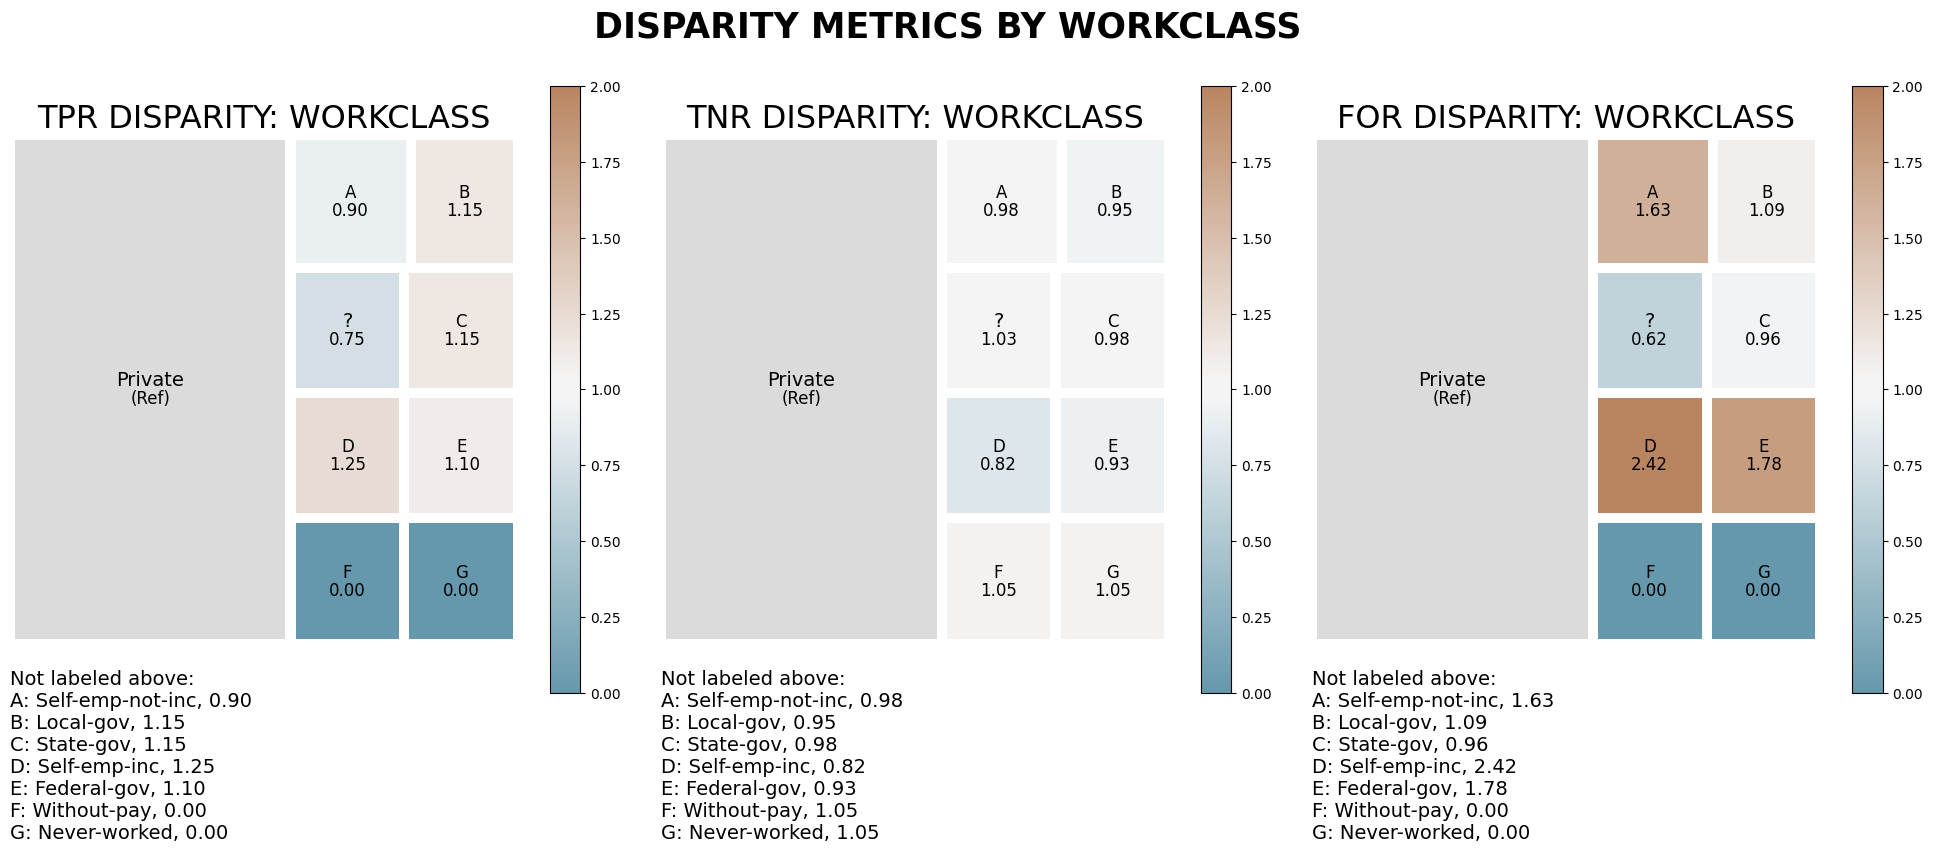

In [10]:
disp_wc = aqp.plot_disparity_all(bias_df, attributes=['workclass'], metrics = 
                                 ['tpr_disparity', 'tnr_disparity', 'for_disparity'], significance_alpha=0.05)

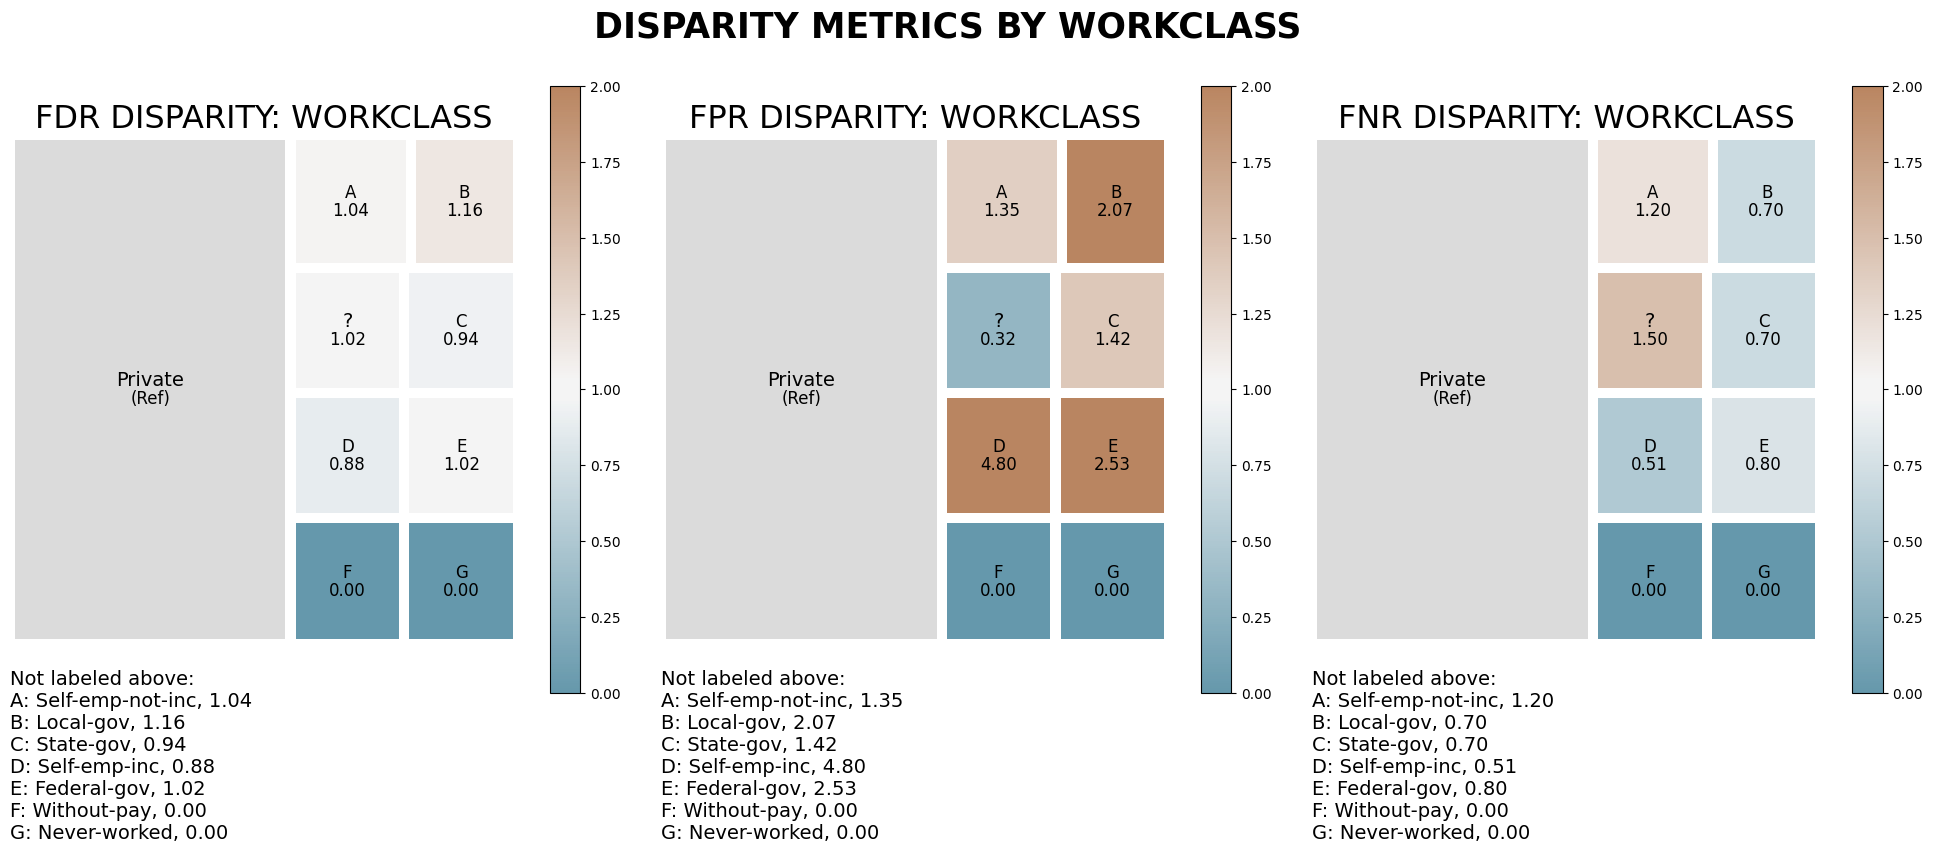

In [11]:
disp_wc = aqp.plot_disparity_all(bias_df, attributes=['workclass'], metrics = 
                                 ['fdr_disparity', 'fpr_disparity', 'fnr_disparity'], significance_alpha=0.05)

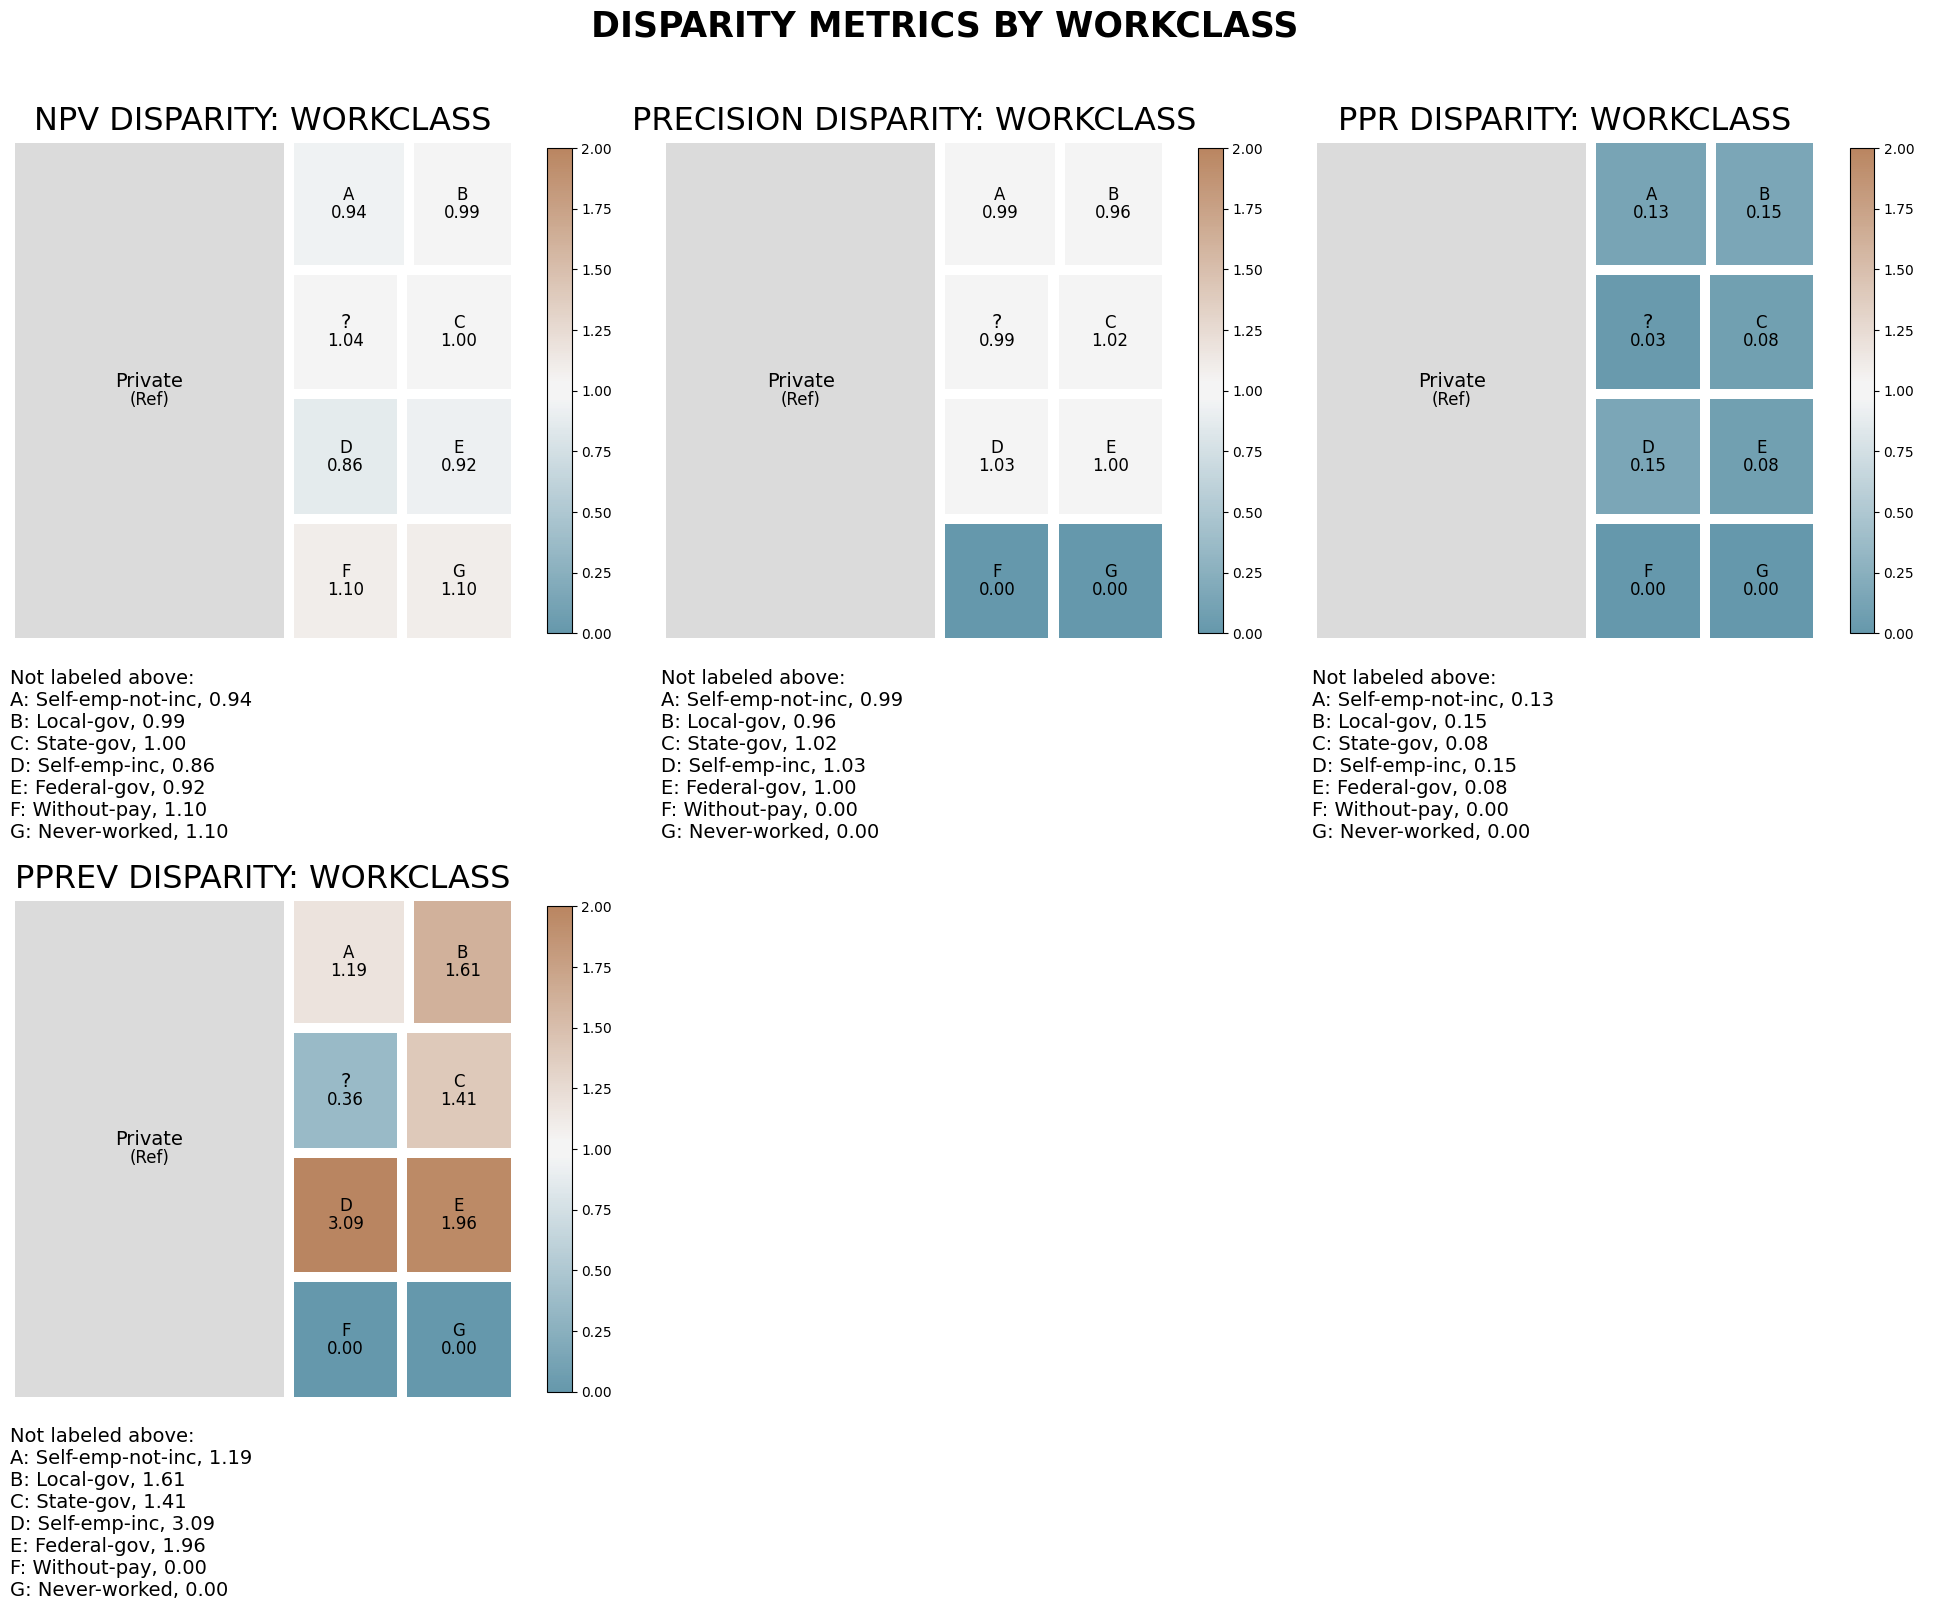

In [12]:
disp_wc = aqp.plot_disparity_all(bias_df, attributes=['workclass'], metrics = 
                                 ['npv_disparity', 'precision_disparity', 'ppr_disparity', 'pprev_disparity'],
                                 significance_alpha=0.05)

As we see above, those in 'Self-emp-inc' are most falsely identified as those earning more than fifty thousand dollars, whereas those whose workclass is unclear ("?") are most likely to be falsely identified as earning lower than that. The NPV, Precision, PPREV disparity, etc. are also shown above.

More plots comparing the disparities based on other categorical features can be found below.

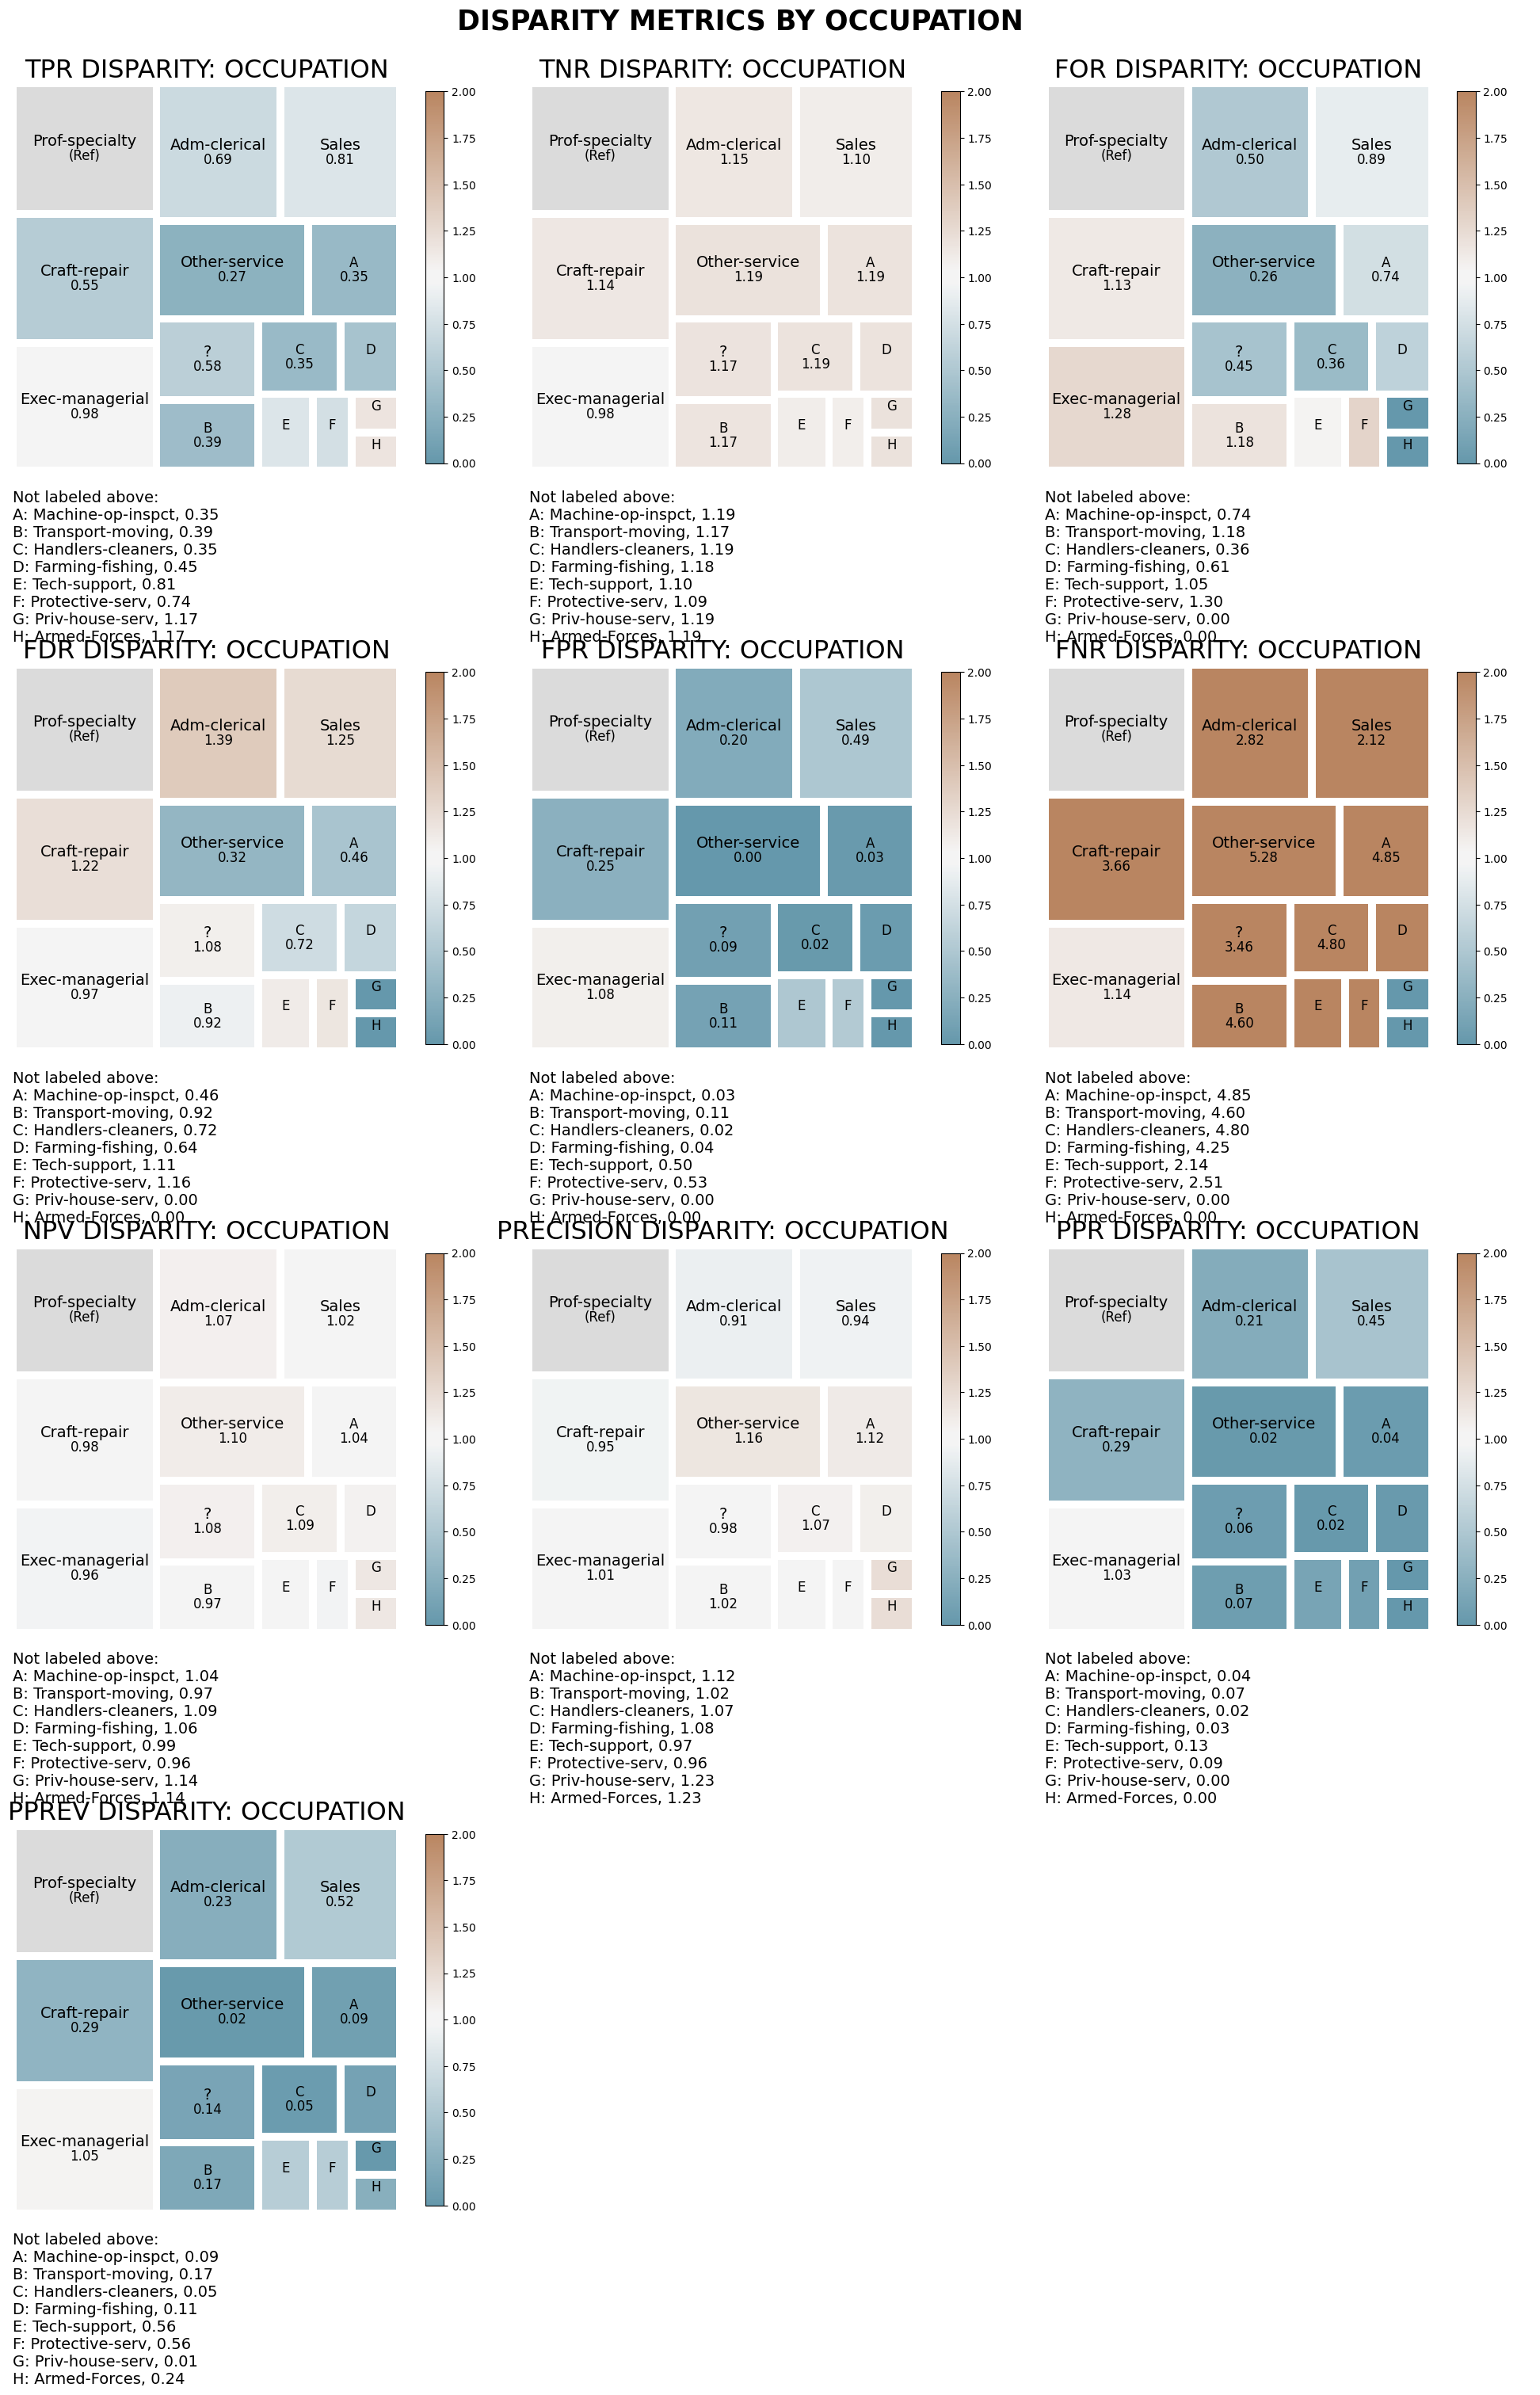

In [13]:
disp_oc = aqp.plot_disparity_all(bias_df, attributes=['occupation'], metrics = 'all', significance_alpha=0.05)

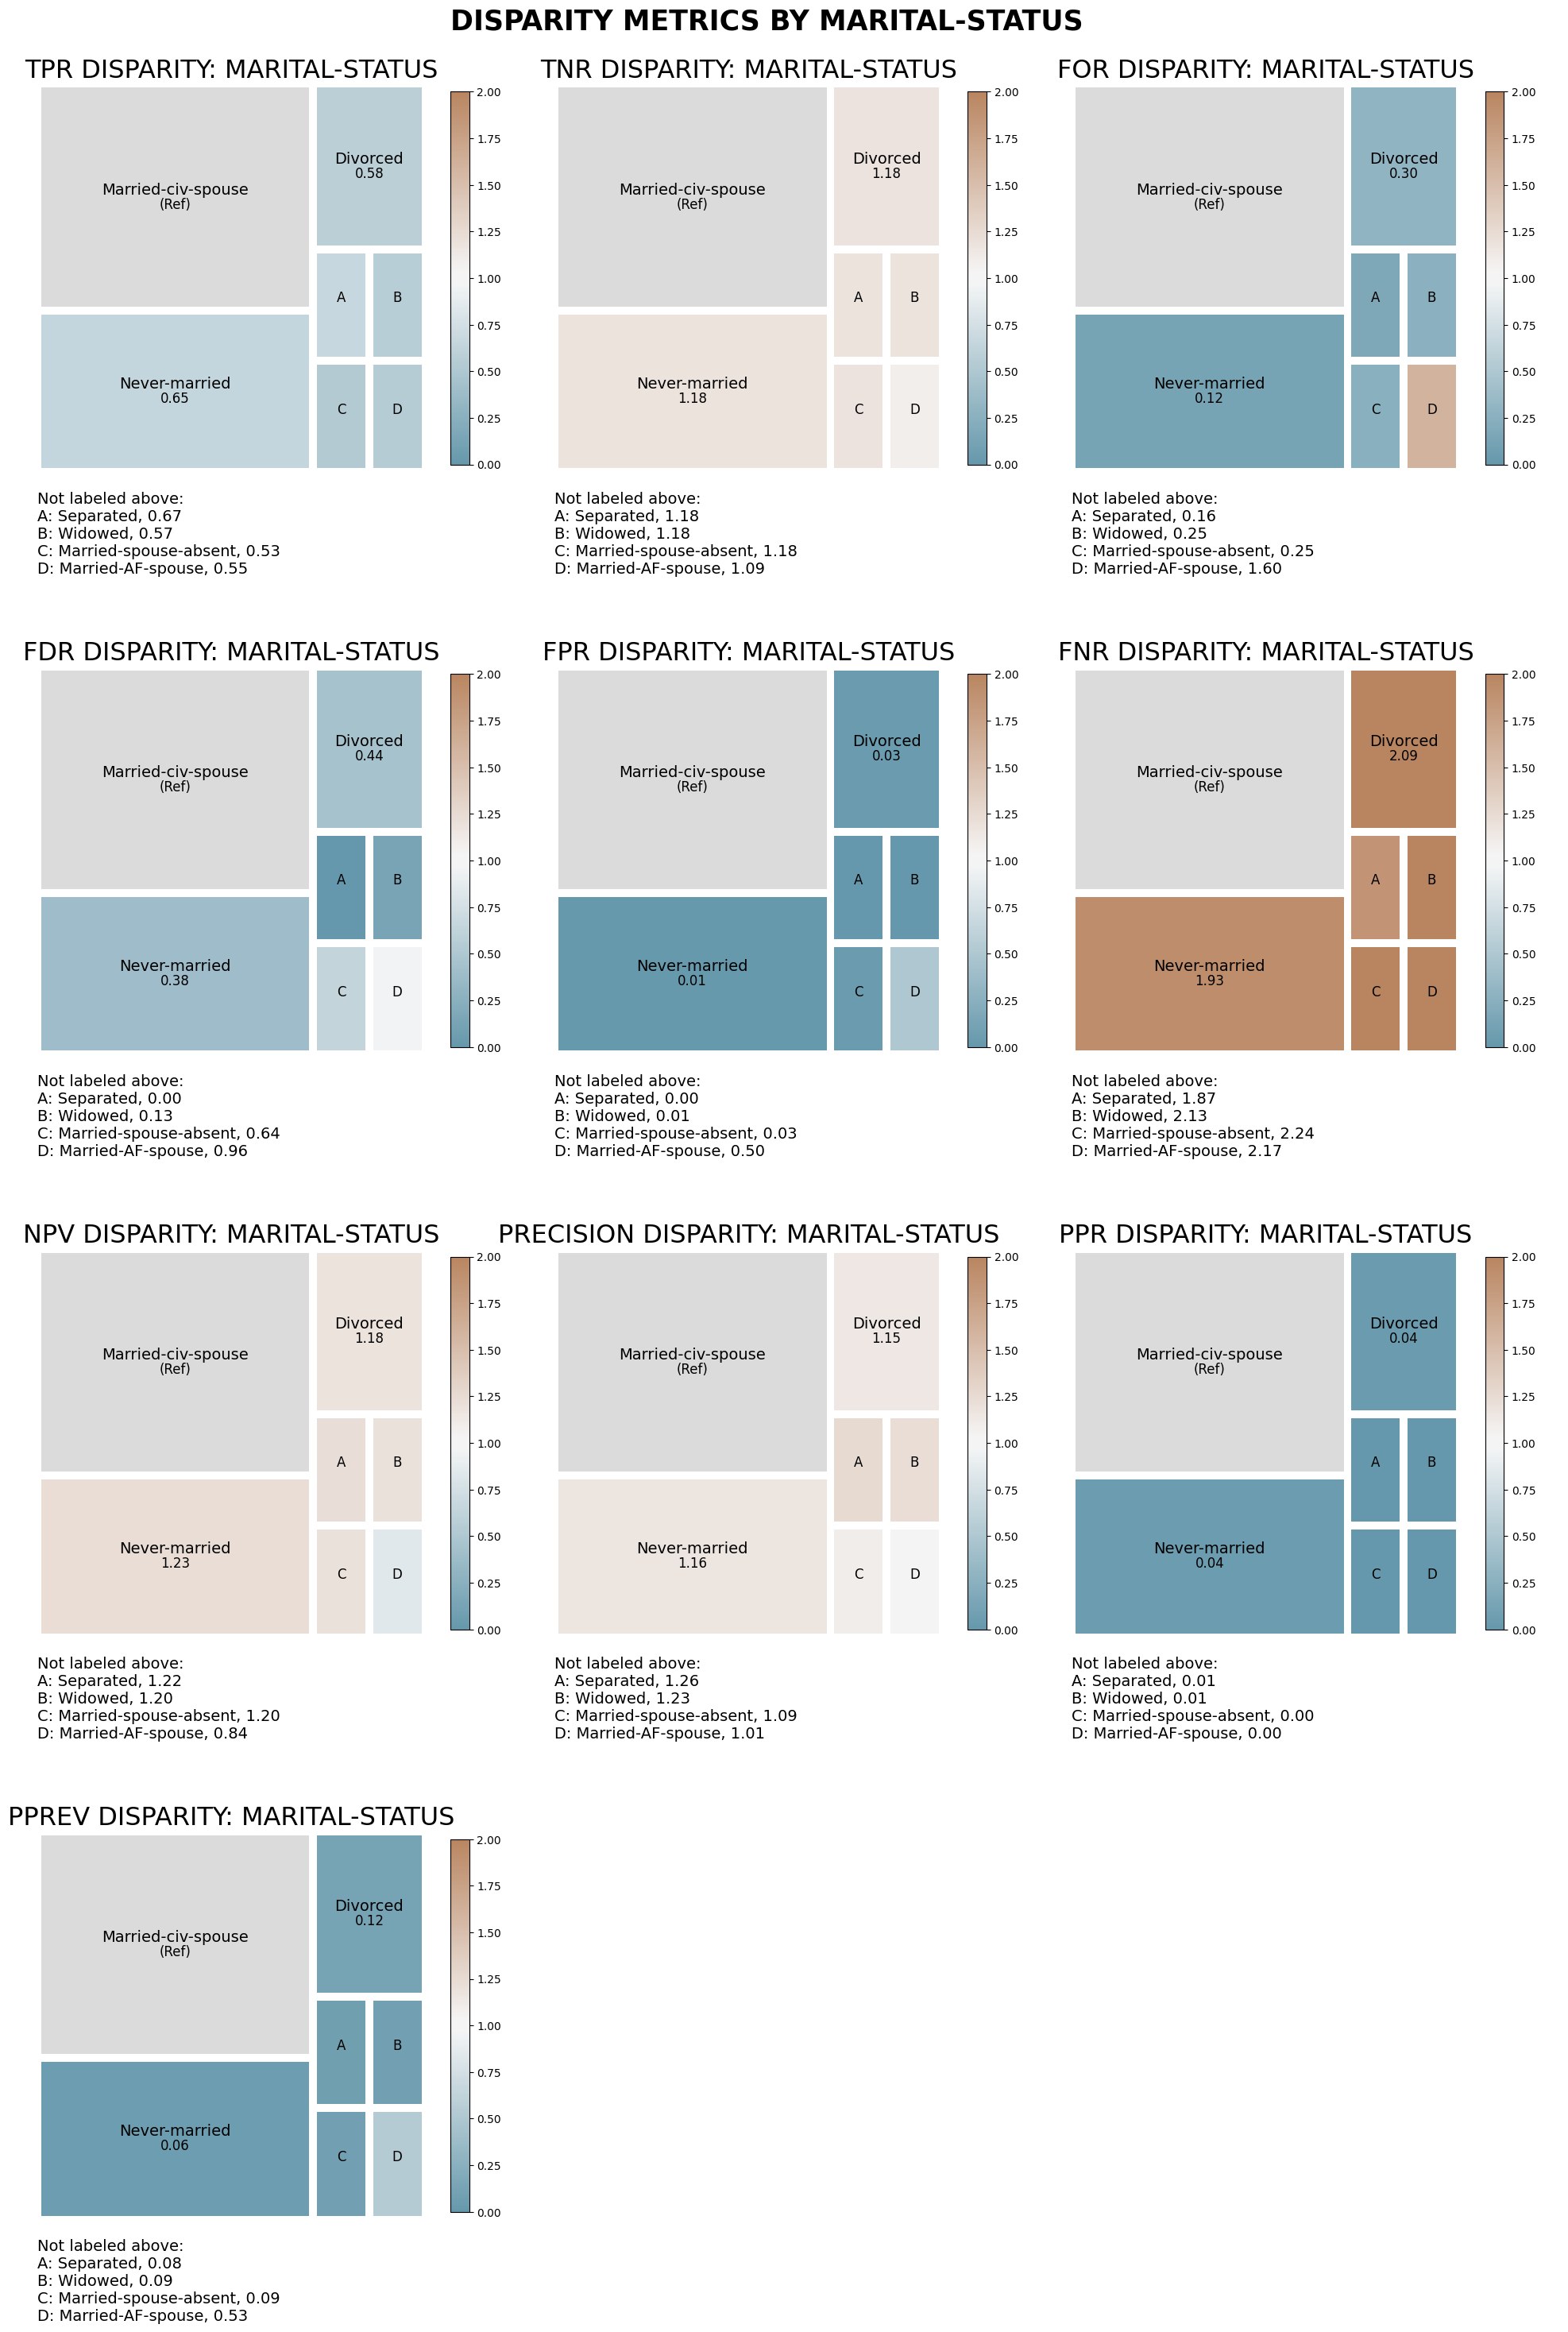

In [14]:
disp_ms = aqp.plot_disparity_all(bias_df, attributes=['marital-status'], metrics = 'all', significance_alpha=0.05)

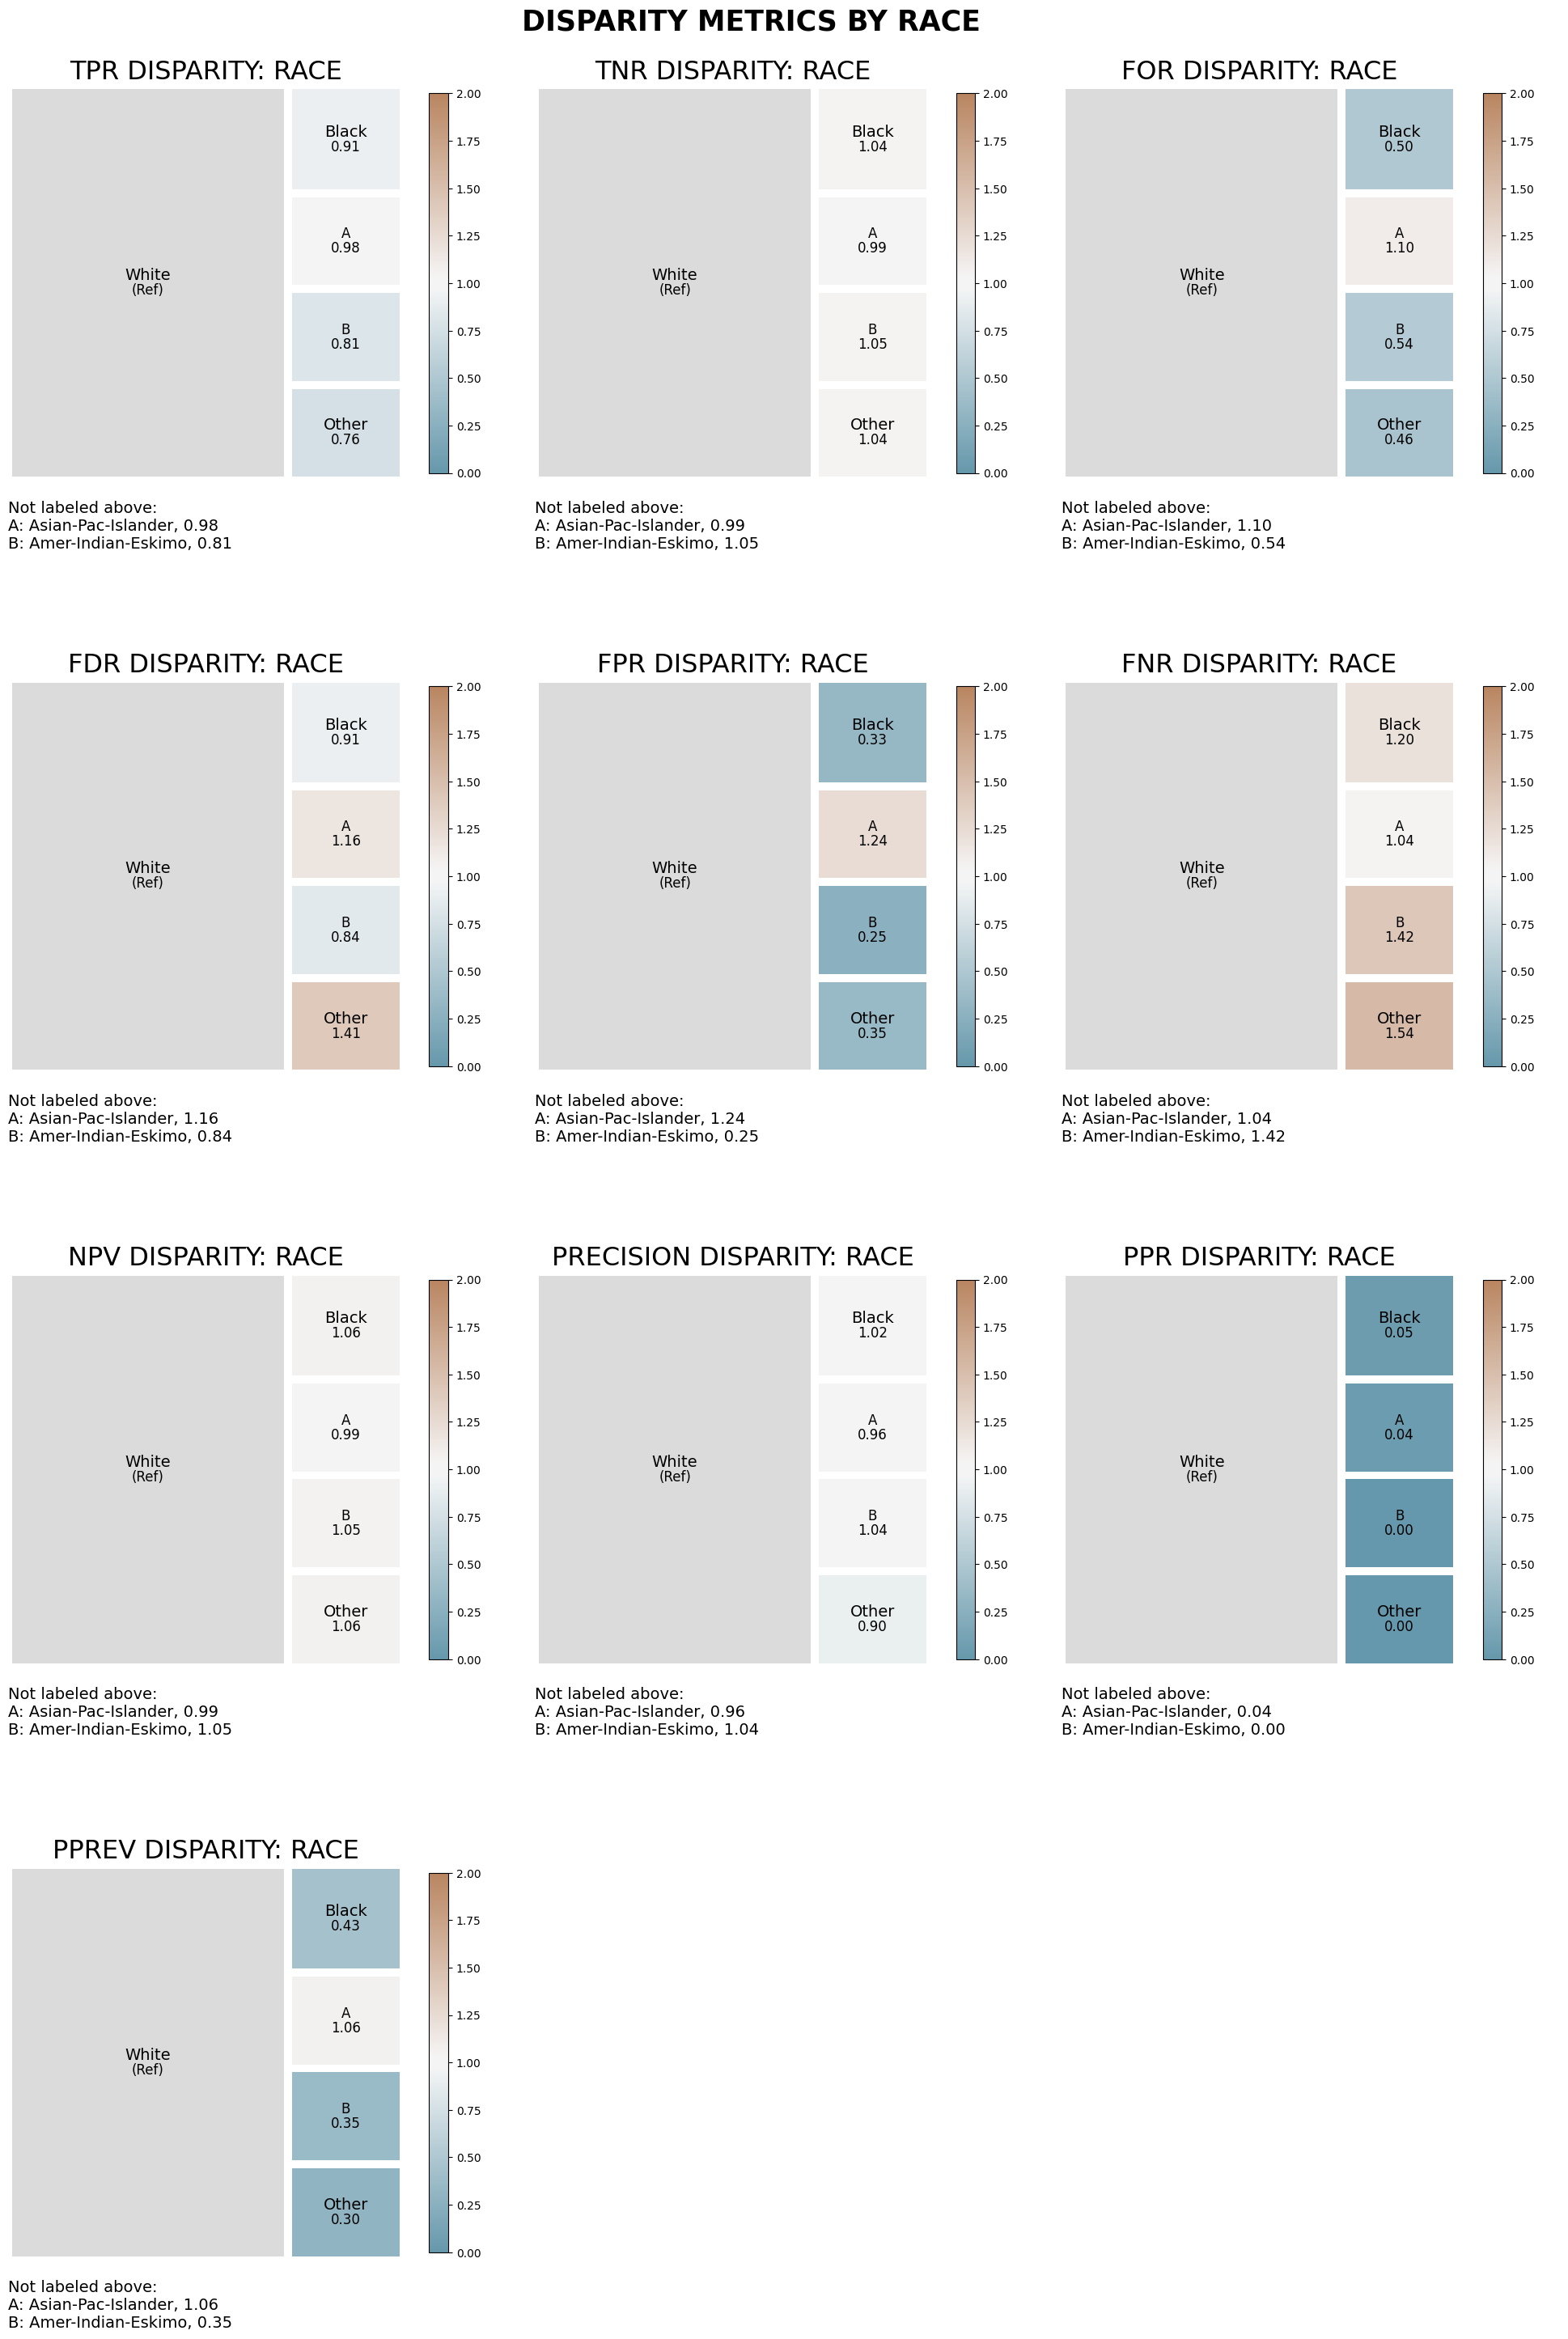

In [15]:
disp_rc = aqp.plot_disparity_all(bias_df, attributes=['race'], metrics = 'all', significance_alpha=0.05)

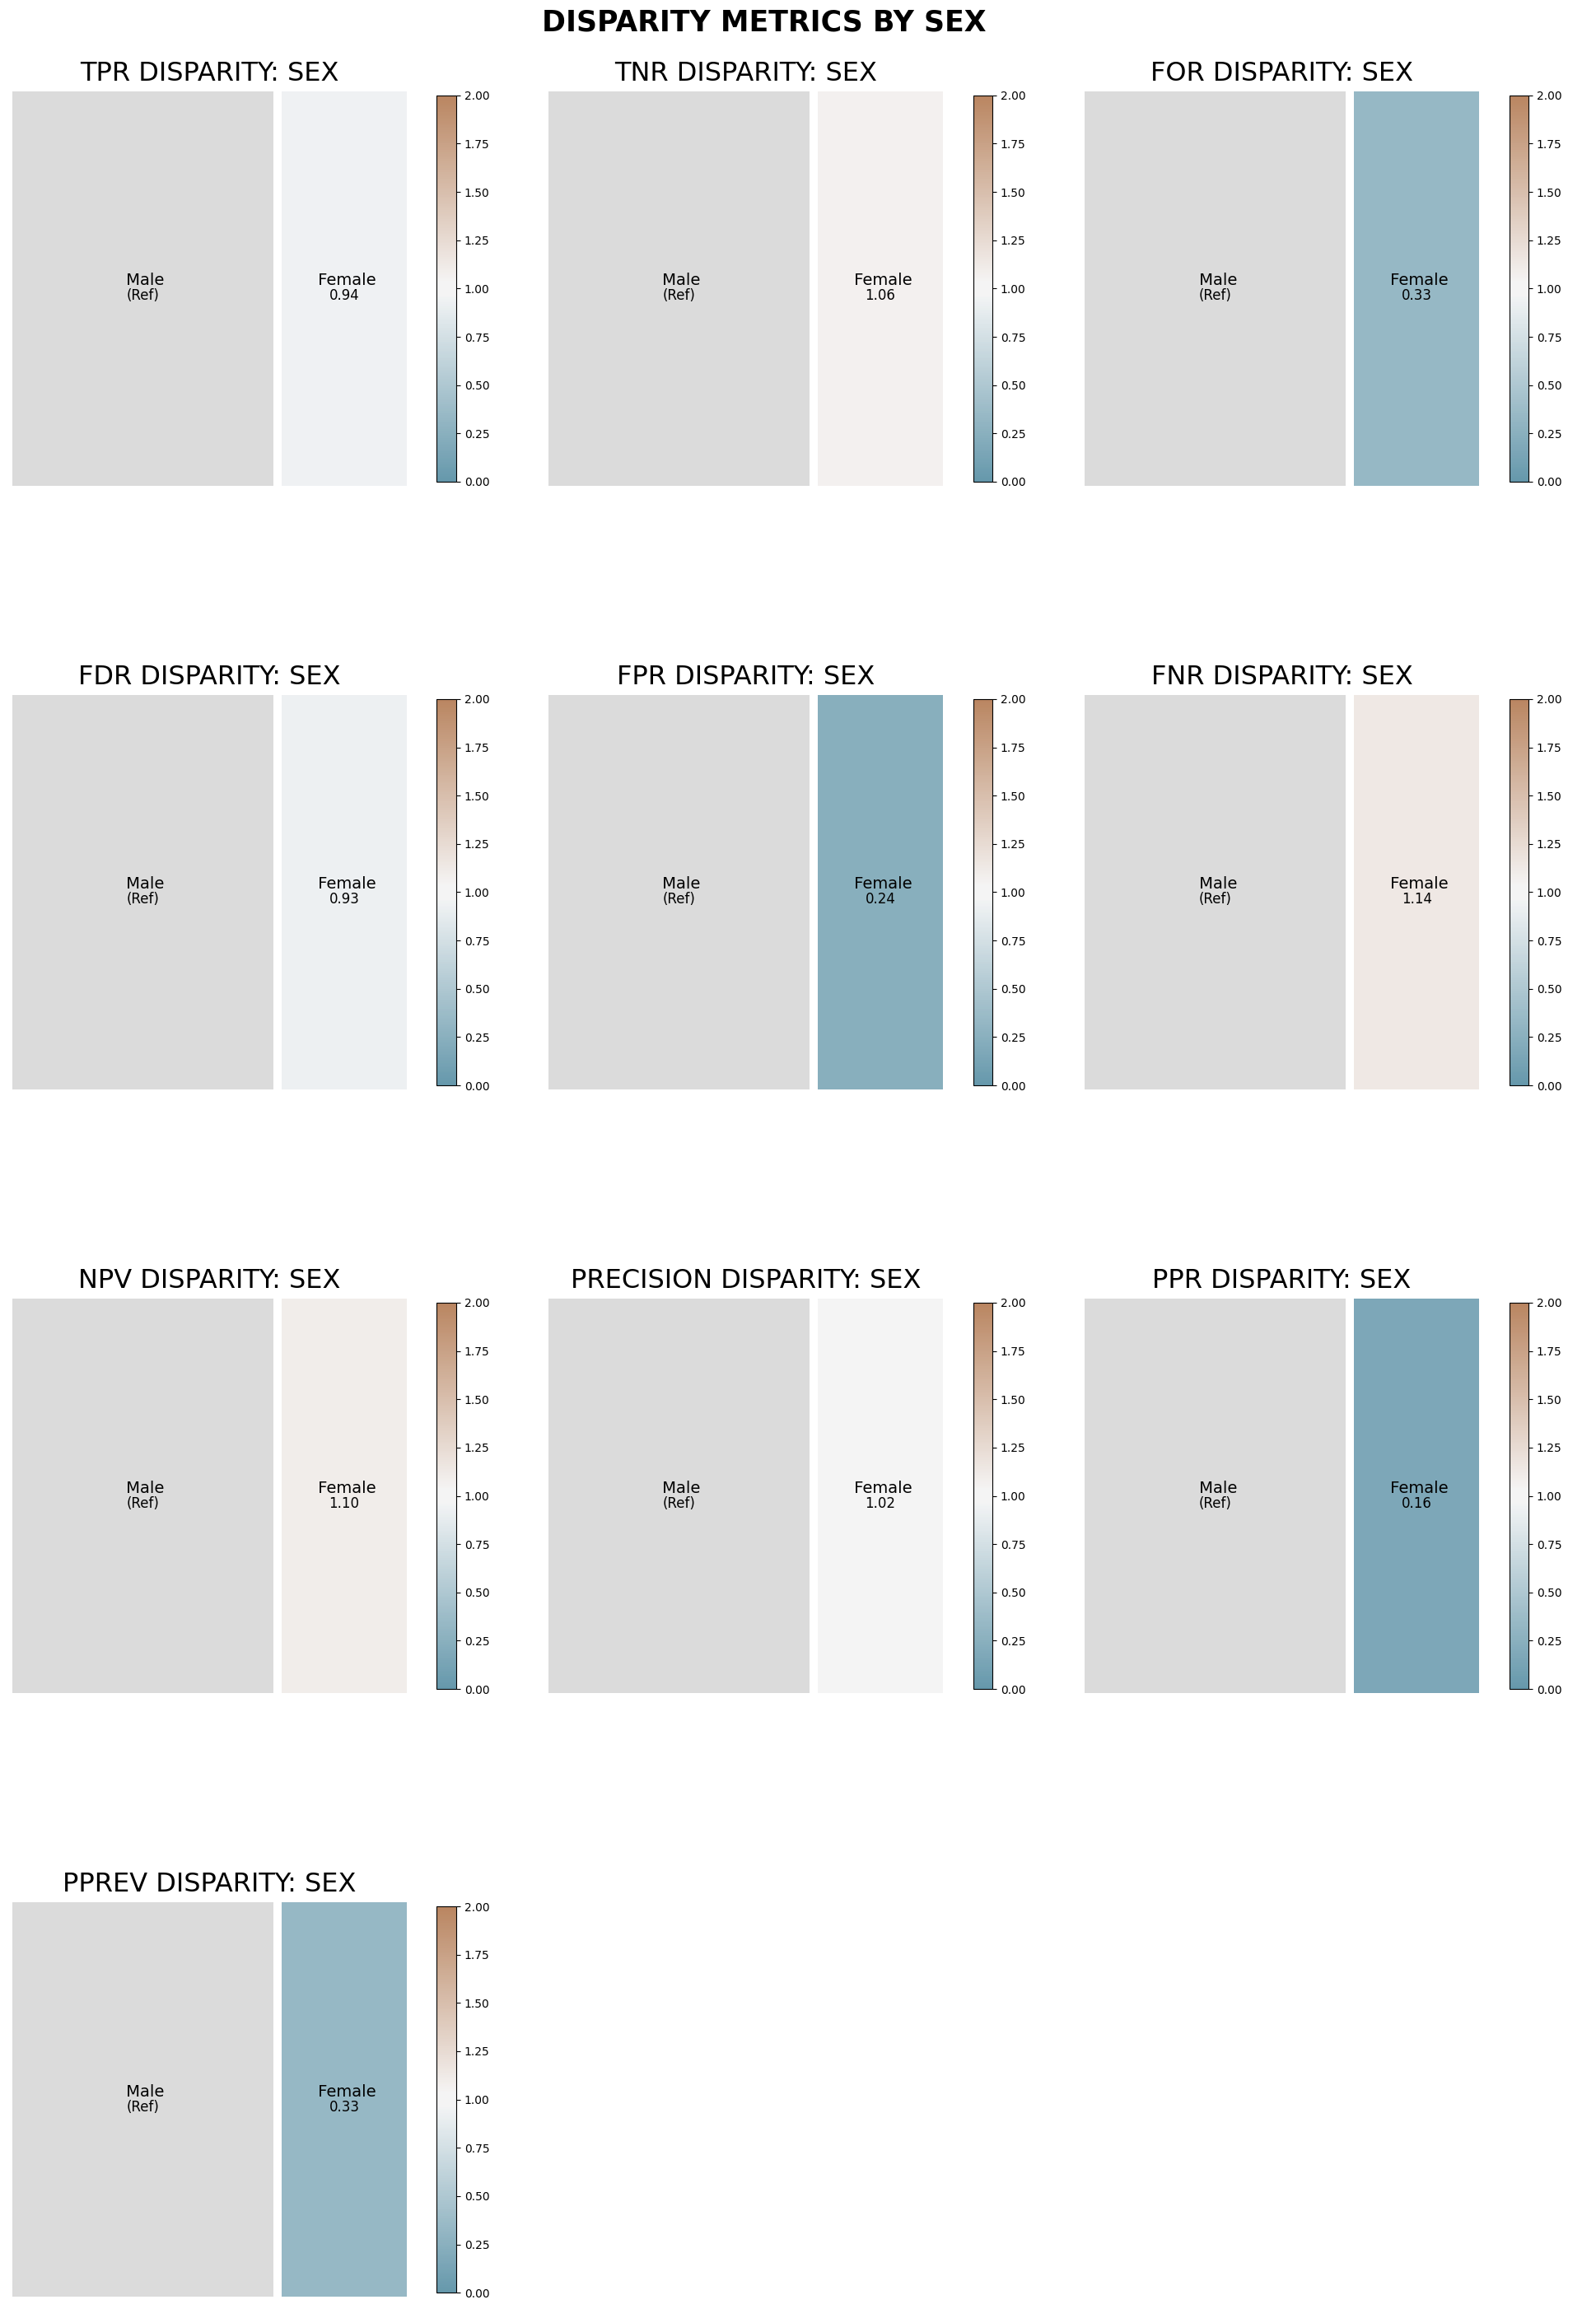

In [16]:
disp_sex = aqp.plot_disparity_all(bias_df, attributes=['sex'], metrics = 'all', significance_alpha=0.05)

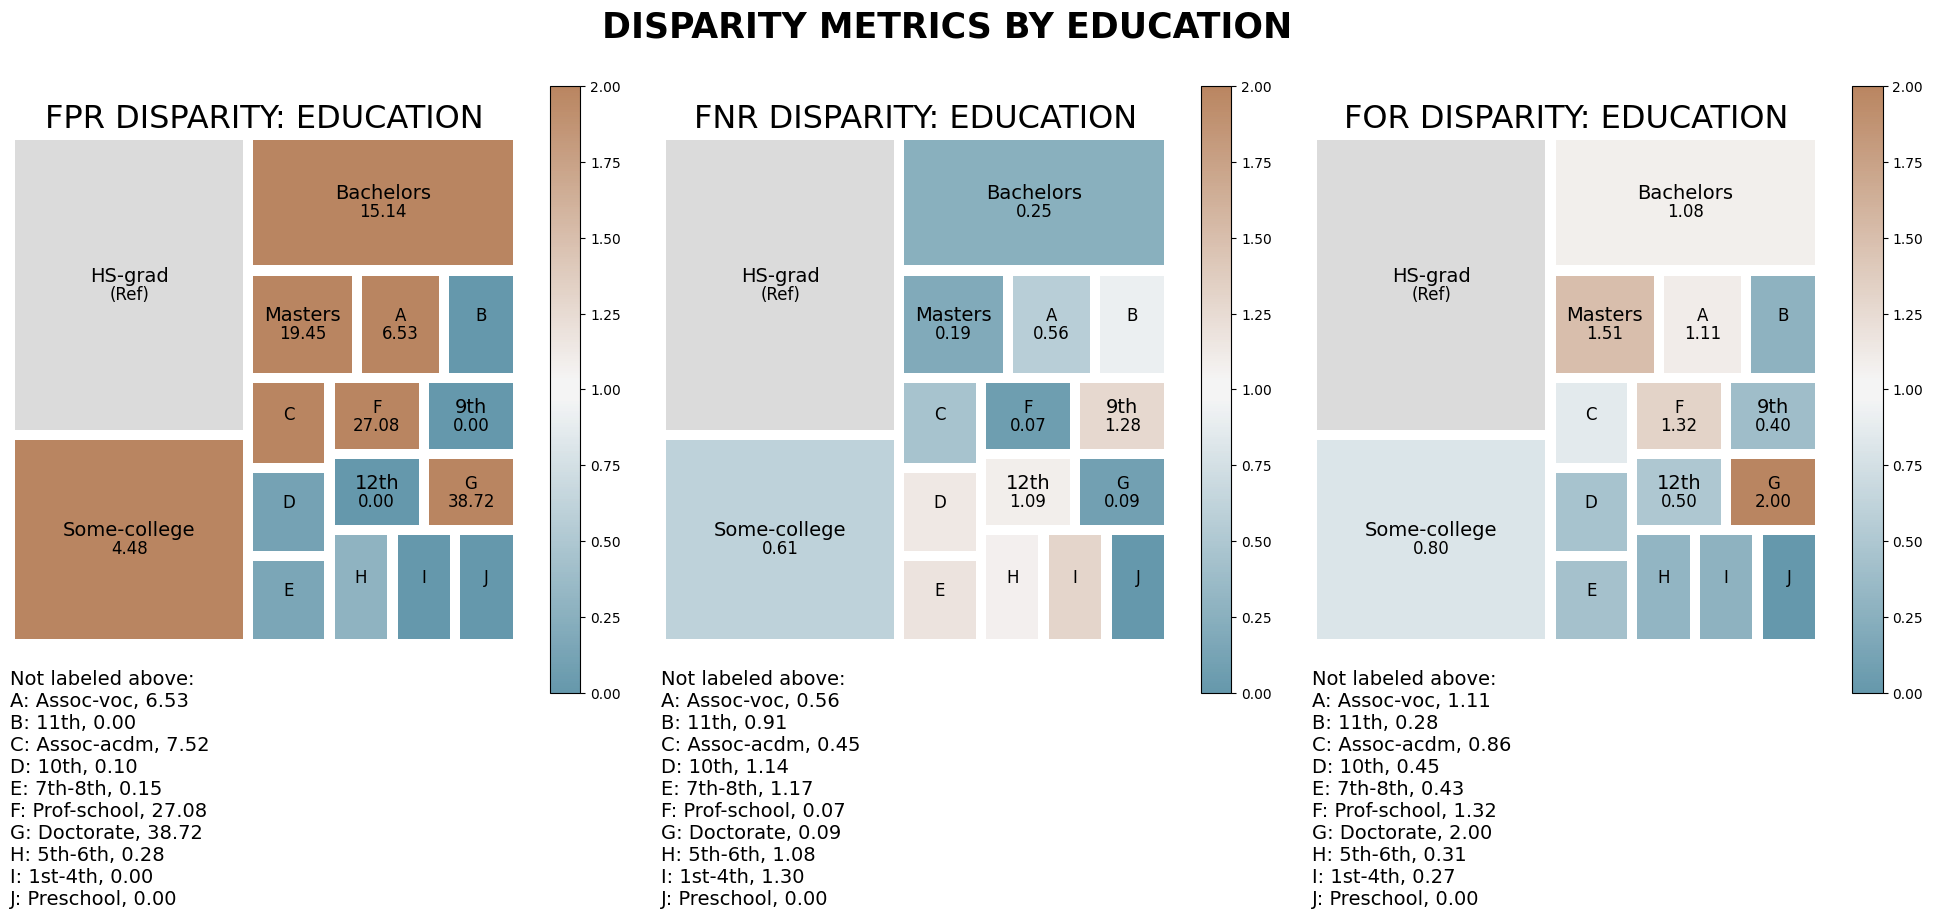

In [17]:
disp_edu = aqp.plot_disparity_all(bias_df, attributes=['education'], metrics = ['fpr_disparity', 'fnr_disparity', 'for_disparity'], significance_alpha=0.05)


## Assessing Model Fairness

Finally, using the bias and disparity metrics calculated above, we will obtain the slice-specific and overall model fairness.

In [18]:
# Get fairness metrics
fairness = Fairness()
fairness_df = fairness.get_group_value_fairness(bias_df)
fairness_df.head(10)

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,6675,workclass,?,0.497382,0.985410,0.055911,0.201681,0.014590,0.502618,0.944089,0.798319,119,1717,0.017828,0.064815,24,96,1621,95,191,1645,1836,32561,0.104031,0.028982,0.358265,0.993905,1.024877,0.624261,0.320196,1.498193,0.748486,1.032454,1.036963,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False
1,0,binary 0/1,6675,workclass,Federal-gov,0.733154,0.884550,0.159677,0.200000,0.115450,0.266846,0.840323,0.800000,340,620,0.050936,0.354167,68,99,521,272,371,589,960,32561,0.386458,0.082806,1.957664,0.995998,1.016337,1.782825,2.533754,0.795411,1.103287,0.926779,0.922989,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,True,False,False,False,True,True,True,True,False,False,False,False,False
2,0,binary 0/1,6675,workclass,Local-gov,0.764992,0.905827,0.097841,0.227496,0.094173,0.235008,0.902159,0.772504,611,1482,0.091536,0.291925,139,145,1337,472,617,1476,2093,32561,0.294792,0.148807,1.613624,0.961765,1.156062,1.092408,2.066804,0.700508,1.151199,0.949071,0.990909,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,True,False,True,False,True,True,True,True,False,False,False,False,False
3,0,binary 0/1,6675,workclass,Never-worked,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,7,0.000000,0.000000,0,0,7,0,0,7,7,32561,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,1.047740,1.098375,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,NaN,False,False,NaN,NaN,True,True,NaN,False,False,False,False,False
4,0,binary 0/1,6675,workclass,Private,0.664517,0.954435,0.089564,0.196785,0.045565,0.335483,0.910436,0.803215,4106,18590,0.615131,0.180913,808,1665,16925,3298,4963,17733,22696,32561,0.218673,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,0,binary 0/1,6675,workclass,Self-emp-inc,0.827974,0.781377,0.217039,0.173355,0.218623,0.172026,0.782961,0.826645,623,493,0.093333,0.558244,108,107,386,515,622,494,1116,32561,0.557348,0.151729,3.085704,1.029171,0.880934,2.423271,4.798082,0.512771,1.245978,0.818679,0.859985,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,True,False,False,False,True,True,True,True,False,False,False,False,False
6,0,binary 0/1,6675,workclass,Self-emp-not-inc,0.598066,0.938360,0.145792,0.205505,0.061640,0.401934,0.854208,0.794495,545,1996,0.081648,0.214482,112,291,1705,433,724,1817,2541,32561,0.284927,0.132733,1.185556,0.989144,1.044309,1.627787,1.352801,1.198076,0.900001,0.983157,0.938241,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,True,True,False,False,True,True,True,True,True,False,False,False,False,False
7,0,binary 0/1,6675,workclass,State-gov,0.764873,0.935450,0.085832,0.184290,0.064550,0.235127,0.914168,0.815710,331,967,0.049588,0.255008,61,83,884,270,353,945,1298,32561,0.271957,0.080614,1.409560,1.015556,0.936504,0.958334,1.416671,0.700863,

In [19]:
# Overall fairness
overall_fairness = fairness.get_overall_fairness(fairness_df)
print(overall_fairness)

{'Unsupervised Fairness': False, 'Supervised Fairness': False, 'Overall Fairness': False}


### Plotting Some Results

Some plots regarding the model fairness towards each subgroup (slice) can be found below.

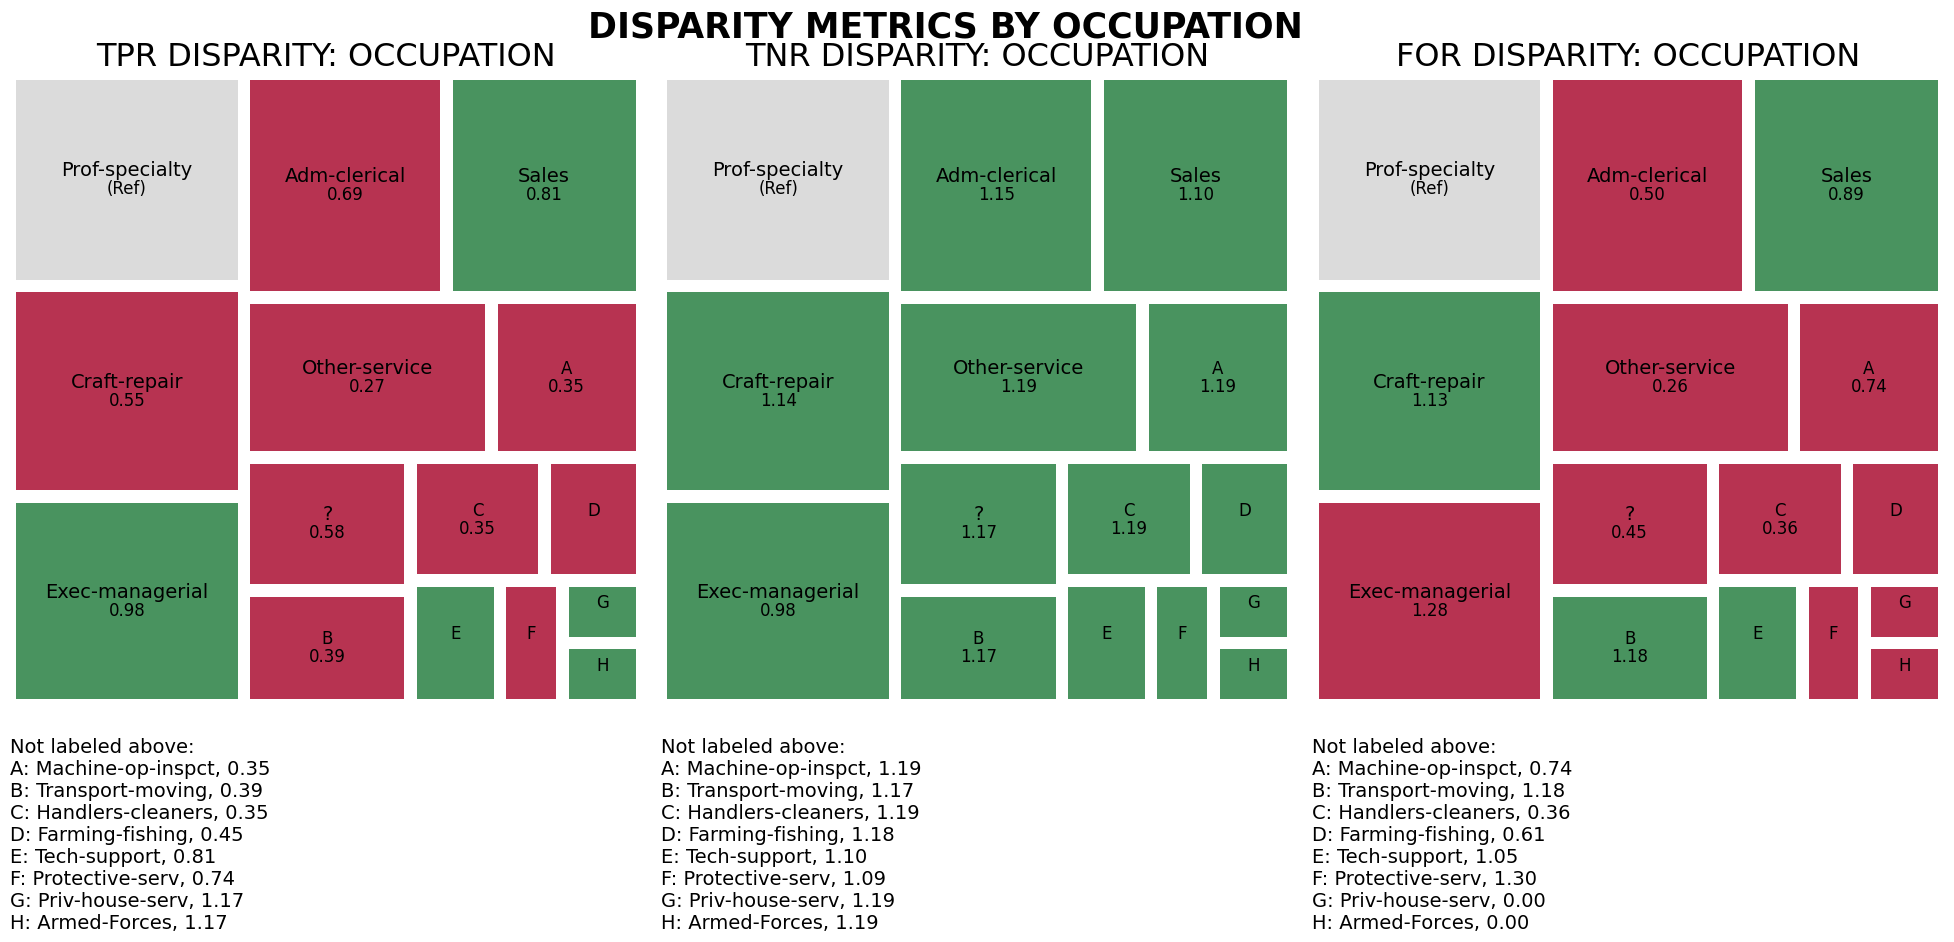

In [20]:
f_oc = aqp.plot_fairness_disparity_all(fairness_df, attributes=['occupation'], 
                                       metrics=['tpr_disparity', 'tnr_disparity', 'for_disparity'],
                                       significance_alpha=0.05)

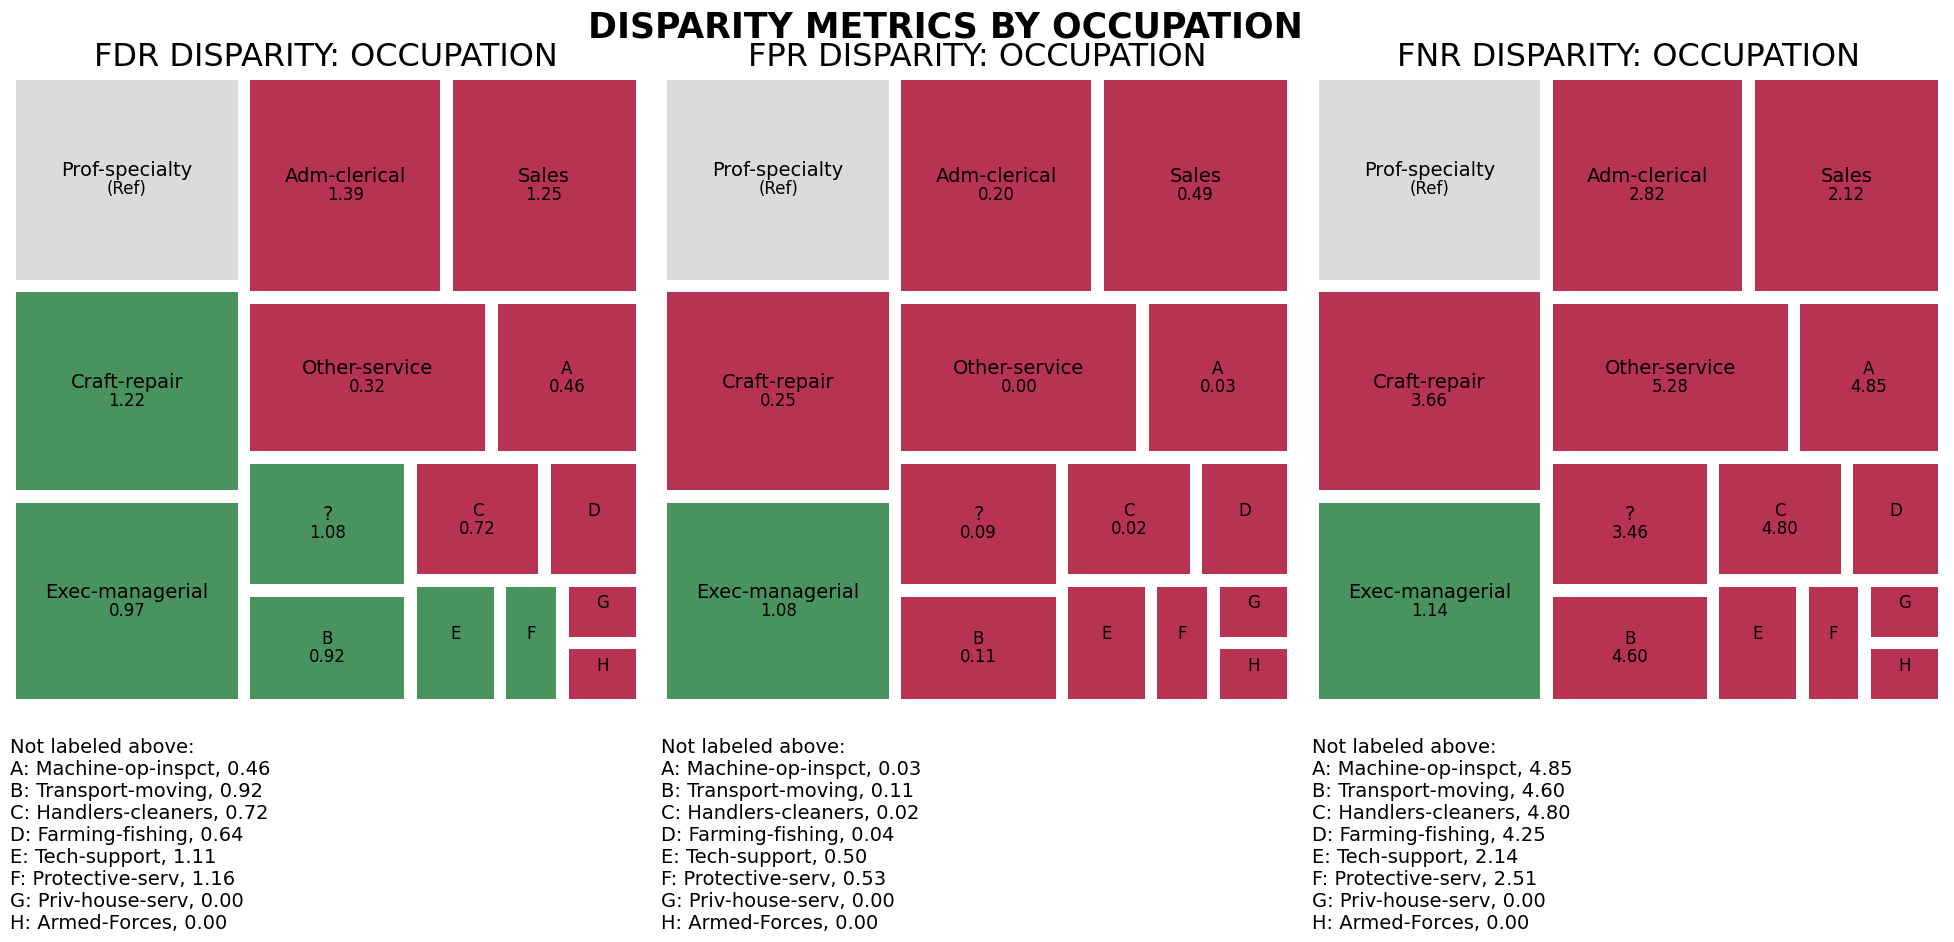

In [21]:
f_oc = aqp.plot_fairness_disparity_all(fairness_df, attributes=['occupation'], 
                                       metrics=['fdr_disparity', 'fpr_disparity', 'fnr_disparity'],
                                       significance_alpha=0.05)

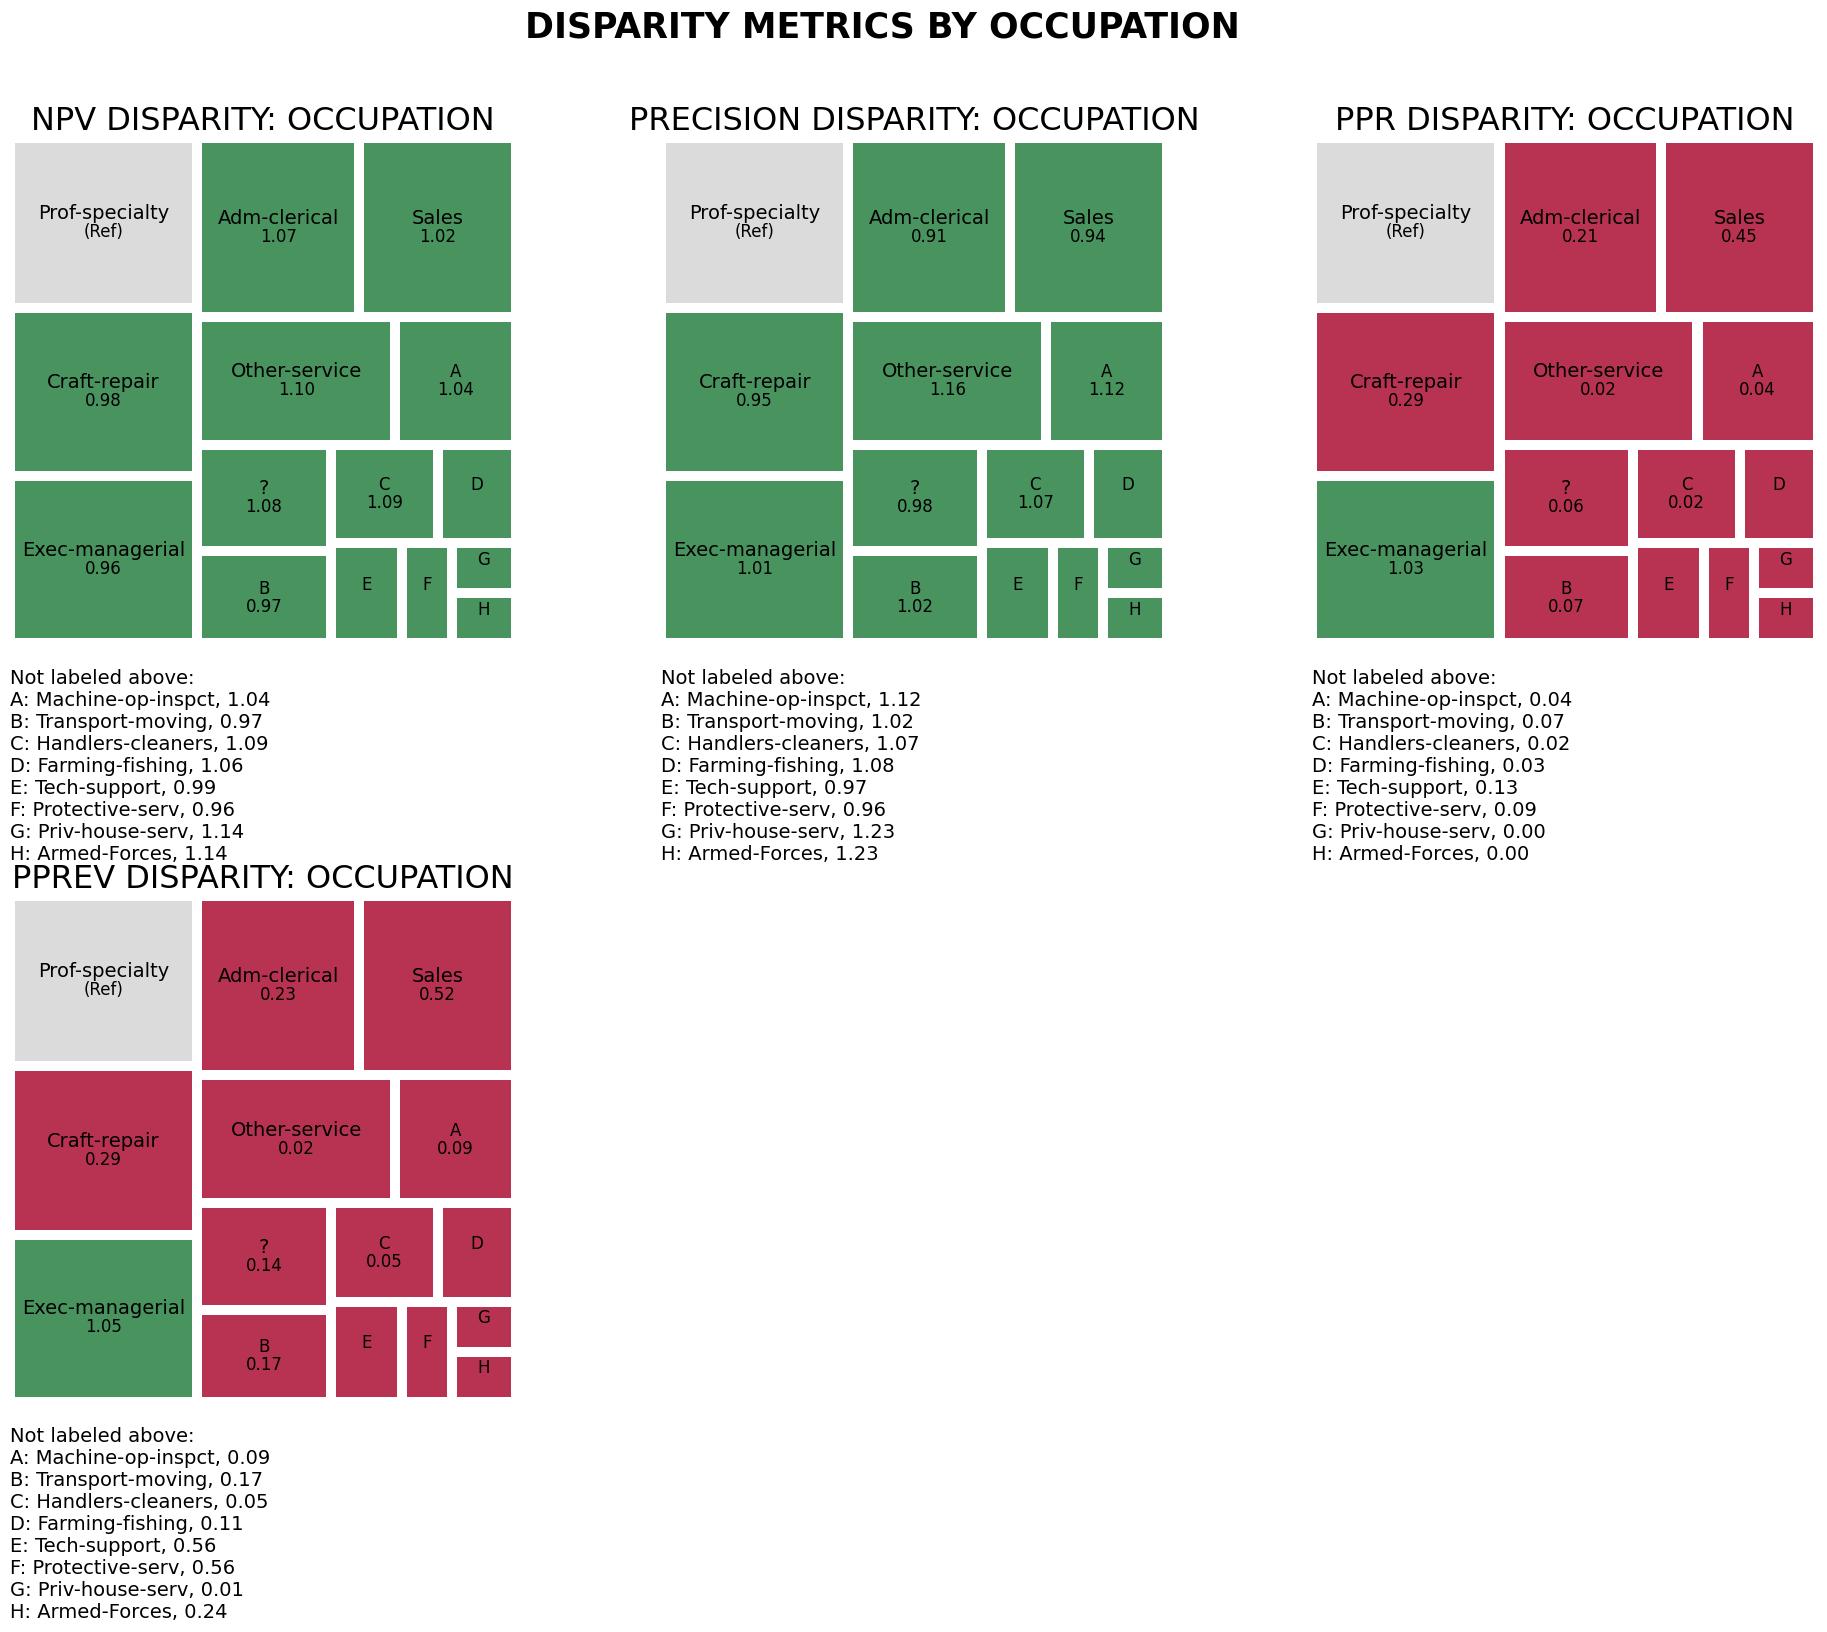

In [22]:
f_oc = aqp.plot_fairness_disparity_all(fairness_df, attributes=['occupation'], 
                                       metrics=['npv_disparity', 'precision_disparity', 'ppr_disparity', 'pprev_disparity'],
                                       significance_alpha=0.05)

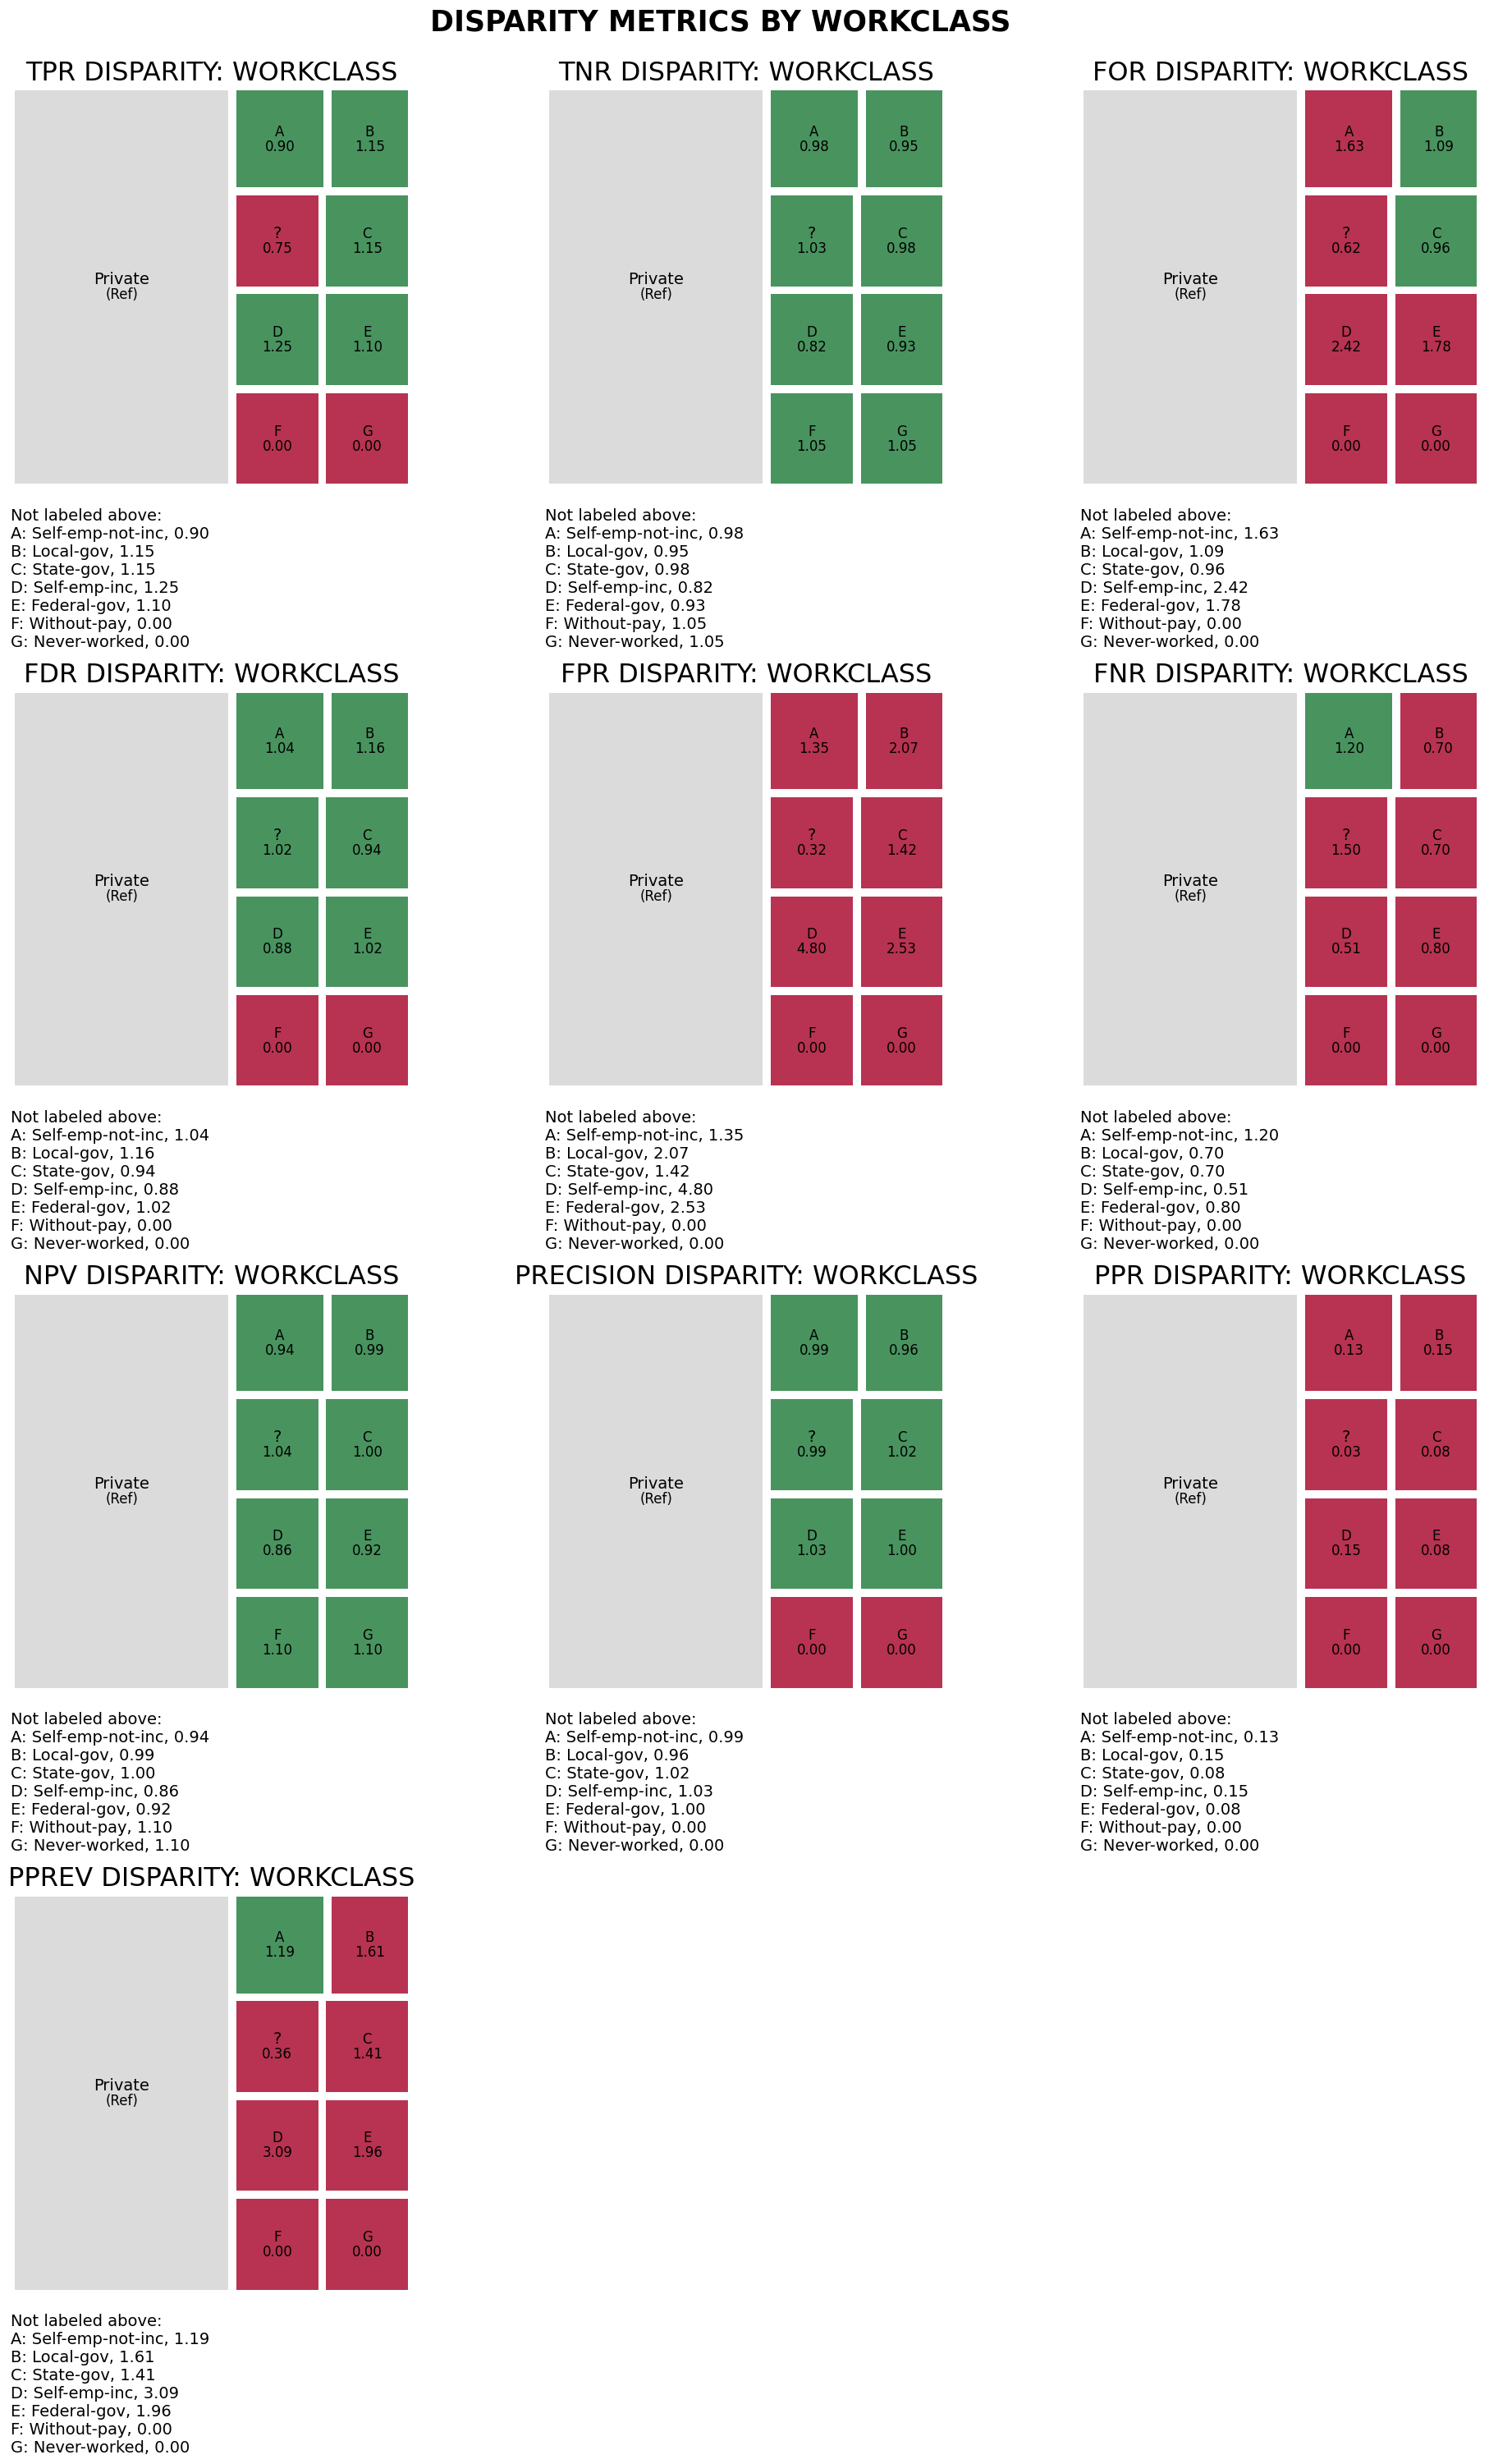

In [23]:
f_wc = aqp.plot_fairness_disparity_all(fairness_df, attributes=['workclass'], metrics='all',
                                       significance_alpha=0.05)

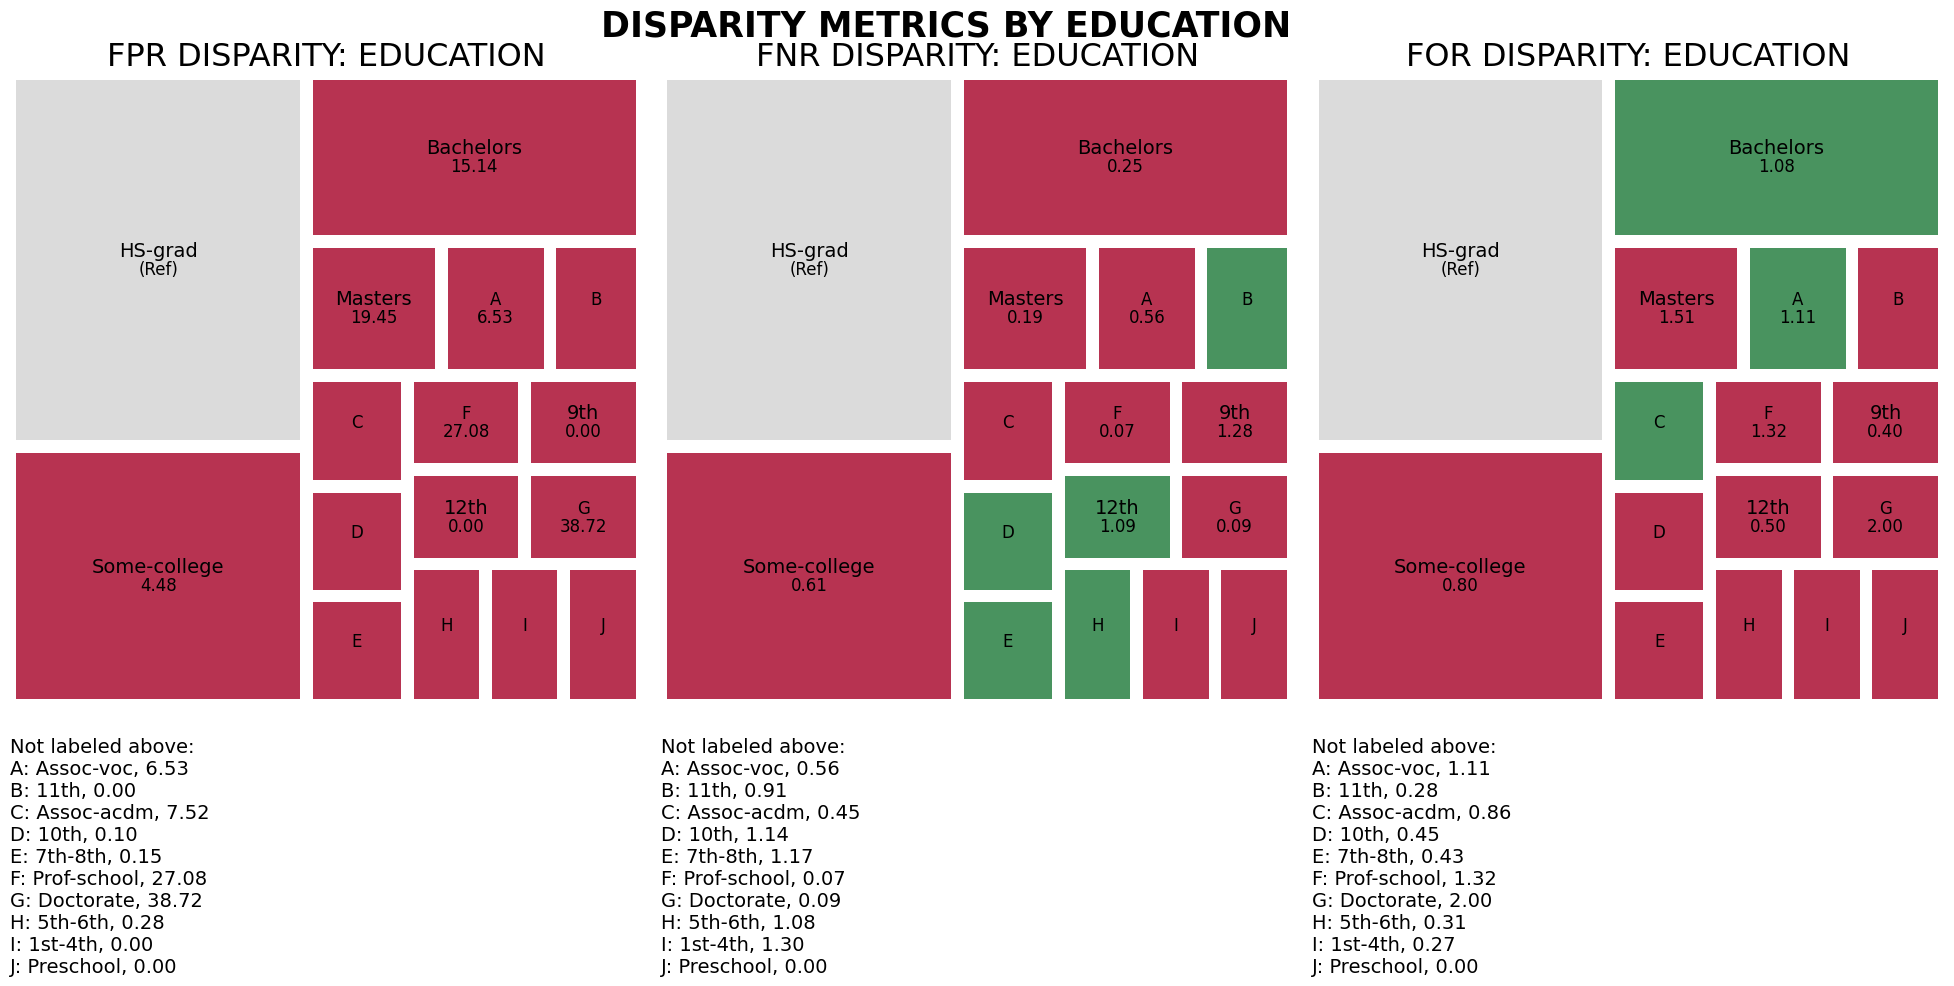

In [24]:
f_edu = aqp.plot_fairness_disparity_all(fairness_df, attributes=['education'], 
                                       metrics=['fpr_disparity', 'fnr_disparity', 'for_disparity'],
                                       significance_alpha=0.05)